In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import warnings; warnings.simplefilter('ignore')
from sklearn.datasets import load_digits
from tabulate import tabulate
from sklearn.feature_selection import SelectKBest, chi2, f_classif

In [2]:
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn import metrics
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.preprocessing import OrdinalEncoder 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import *
from sklearn.tree import *
from sklearn.ensemble import RandomForestClassifier

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
origin_airport = 'JFK'
dest_airport = 'LAX'

In [5]:
#air_df = pd.read_csv('/content/gdrive/My Drive/IE7275/Project/Dataset/LAX.csv')
air_df = pd.read_csv('/content/gdrive/My Drive/NEU_DAE/DAE_Projects/IE7275/Project/Dataset/LAX.csv')              #Jeff

In [6]:
air_delay = air_df.copy()

In [7]:
air_delay.head()

,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,TAIL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
0,2010,1,1,5,AA,N3EVAA,LAX,ORD,1230.0,1226.0,-4.0,1845.0,1816.0,-29.0,255.0,230.0,209.0,0.0,0.0,0.0,0.0,0.0
1,2010,1,2,6,AA,N3EWAA,LAX,ORD,1230.0,1226.0,-4.0,1845.0,1818.0,-27.0,255.0,232.0,208.0,0.0,0.0,0.0,0.0,0.0
2,2010,1,3,7,AA,N3DTAA,LAX,ORD,1230.0,1229.0,-1.0,1845.0,1833.0,-12.0,255.0,244.0,211.0,0.0,0.0,0.0,0.0,0.0
3,2010,1,4,1,AA,N3EPAA,LAX,ORD,1230.0,1229.0,-1.0,1845.0,1932.0,47.0,255.0,303.0,239.0,0.0,0.0,47.0,0.0,0.0
4,2010,1,5,2,AA,N3DRAA,LAX,ORD,1230.0,1227.0,-3.0,1845.0,1844.0,-1.0,255.0,257.0,224.0,0.0,0.0,0.0,0.0,0.0


In [8]:
air_delay['NAS_DELAY'].value_counts()

0.0      2022494
1.0        11964
2.0        10781
3.0        10375
15.0        9901
          ...   
400.0          1
395.0          1
394.0          1
393.0          1
507.0          1
Name: NAS_DELAY, Length: 428, dtype: int64

In [9]:
air_delay.shape

(2250788, 22)

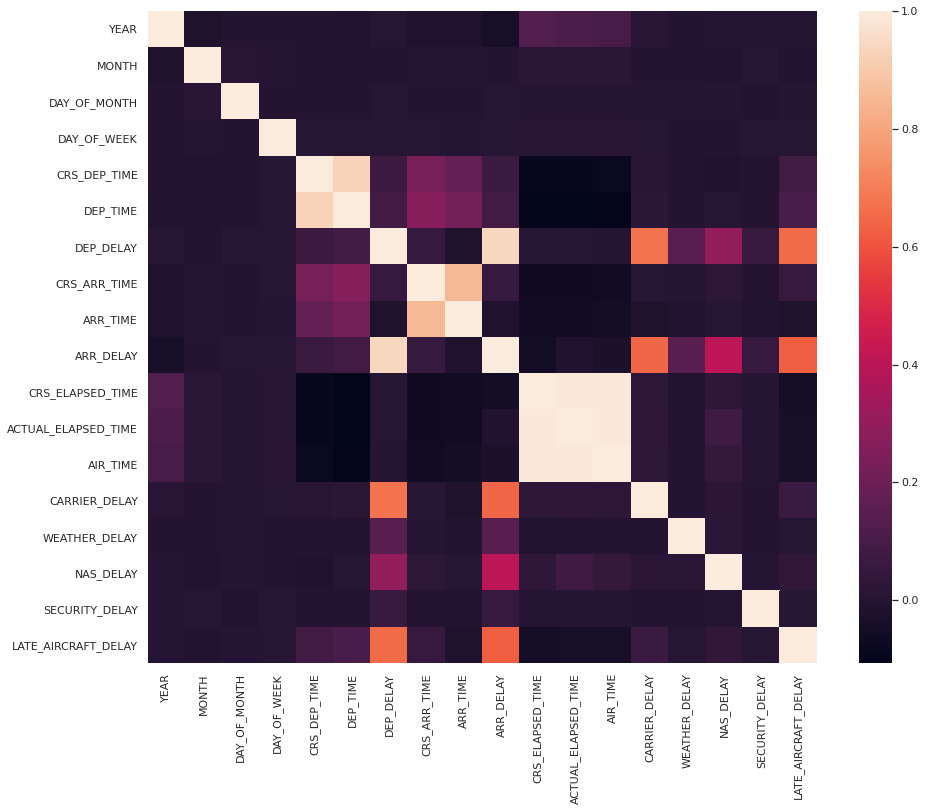

In [10]:
sns.set(rc = {'figure.figsize':(15,12)})
sns.heatmap(air_delay.corr())

In [11]:
air_delay['CRS_DEP_TIME'] = air_delay['CRS_DEP_TIME'].apply(str)
air_delay['CRS_ARR_TIME'] = air_delay['CRS_ARR_TIME'].apply(str)
air_delay['CRS_ARR_TIME'] = pd.to_datetime(air_delay['CRS_ARR_TIME'].str.slice(stop = -2).str.pad(width=4, side='left',fillchar='0'), format='%H%M',errors='coerce')
air_delay['CRS_DEP_TIME'] = pd.to_datetime(air_delay['CRS_DEP_TIME'].str.slice(stop = -2).str.pad(width=4, side='left',fillchar='0'), format='%H%M',errors='coerce')
air_delay.head()


,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,TAIL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
0,2010,1,1,5,AA,N3EVAA,LAX,ORD,1900-01-01 12:30:00,1226.0,-4.0,1900-01-01 18:45:00,1816.0,-29.0,255.0,230.0,209.0,0.0,0.0,0.0,0.0,0.0
1,2010,1,2,6,AA,N3EWAA,LAX,ORD,1900-01-01 12:30:00,1226.0,-4.0,1900-01-01 18:45:00,1818.0,-27.0,255.0,232.0,208.0,0.0,0.0,0.0,0.0,0.0
2,2010,1,3,7,AA,N3DTAA,LAX,ORD,1900-01-01 12:30:00,1229.0,-1.0,1900-01-01 18:45:00,1833.0,-12.0,255.0,244.0,211.0,0.0,0.0,0.0,0.0,0.0
3,2010,1,4,1,AA,N3EPAA,LAX,ORD,1900-01-01 12:30:00,1229.0,-1.0,1900-01-01 18:45:00,1932.0,47.0,255.0,303.0,239.0,0.0,0.0,47.0,0.0,0.0
4,2010,1,5,2,AA,N3DRAA,LAX,ORD,1900-01-01 12:30:00,1227.0,-3.0,1900-01-01 18:45:00,1844.0,-1.0,255.0,257.0,224.0,0.0,0.0,0.0,0.0,0.0


# Viz

In [12]:
air_viz = air_delay.copy()
air_viz['Date'] = pd.to_datetime({'year': air_viz['YEAR'],  'month': air_viz['MONTH'],'day' : air_viz['DAY_OF_MONTH']})

In [13]:
air_viz

,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,TAIL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Date
0,2010,1,1,5,AA,N3EVAA,LAX,ORD,1900-01-01 12:30:00,1226.0,-4.0,1900-01-01 18:45:00,1816.0,-29.0,255.0,230.0,209.0,0.0,0.0,0.0,0.0,0.0,2010-01-01
1,2010,1,2,6,AA,N3EWAA,LAX,ORD,1900-01-01 12:30:00,1226.0,-4.0,1900-01-01 18:45:00,1818.0,-27.0,255.0,232.0,208.0,0.0,0.0,0.0,0.0,0.0,2010-01-02
2,2010,1,3,7,AA,N3DTAA,LAX,ORD,1900-01-01 12:30:00,1229.0,-1.0,1900-01-01 18:45:00,1833.0,-12.0,255.0,244.0,211.0,0.0,0.0,0.0,0.0,0.0,2010-01-03
3,2010,1,4,1,AA,N3EPAA,LAX,ORD,1900-01-01 12:30:00,1229.0,-1.0,1900-01-01 18:45:00,1932.0,47.0,255.0,303.0,239.0,0.0,0.0,47.0,0.0,0.0,2010-01-04
4,2010,1,5,2,AA,N3DRAA,LAX,ORD,1900-01-01 12:30:00,1227.0,-3.0,1900-01-01 18:45:00,1844.0,-1.0,255.0,257.0,224.0,0.0,0.0,0.0,0.0,0.0,2010-01-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2250783,2020,12,27,7,AA,N930AU,LAX,LAS,1900-01-01 11:54:00,1149.0,-5.0,1900-01-01 13:10:00,1253.0,-17.0,76.0,64.0,41.0,0.0,0.0,0.0,0.0,0.0,2020-12-27
2250784,2020,12,28,1,AA,N932AM,LAX,LAS,1900-01-01 11:54:00,1200.0,6.0,1900-01-01 13:10:00,1315.0,5.0,76.0,75.0,47.0,0.0,0.0,0.0,0.0,0.0,2020-12-28
2250785,2020,12,29,2,AA,N996AN,LAX,LAS,1900-01-01 11:54:00,1219.0,25.0,1900-01-01 13:10:00,1325.0,15.0,76.0,66.0,42.0,15.0,0.0,0.0,0.0,0.0,2020-12-29
2250786,2020,12,30,3,AA,N146AA,LAX,LAS,1900-01-01 11:54:00,1149.0,-5.0,1900-01-01 13:10:00,1251.0,-19.0,76.0,62.0,41.0,0.0,0.0,0.0,0.0,0.0,2020-12-30


In [14]:
air_viz = air_viz.groupby([air_viz['Date']]).mean()


In [15]:
from matplotlib import dates as pltdate

[]

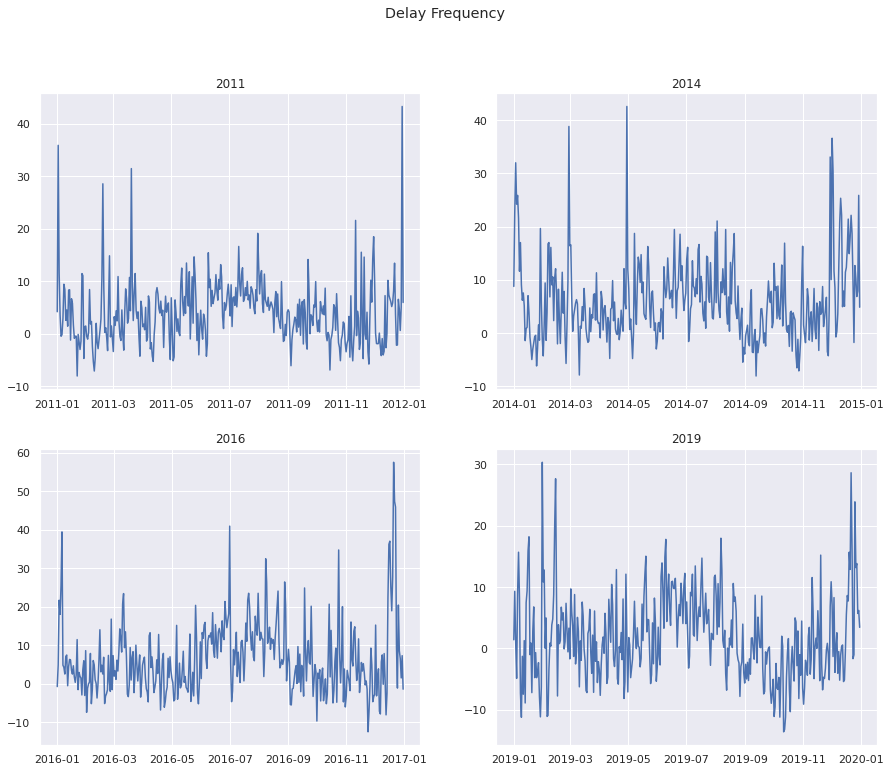

In [17]:
fig, axes = plt.subplots(2, 2)
fig.suptitle('Delay Frequency')

dates1 = pltdate.date2num(air_viz.loc[air_viz['YEAR']==2011,:].index)
axes[0,0].plot_date(dates1, air_viz.loc[air_viz['YEAR']==2011,:]['ARR_DELAY'],'-' )
axes[0,0].set_title('2011')
dates2 = pltdate.date2num(air_viz.loc[air_viz['YEAR']==2014,:].index)
axes[0,1].plot_date(dates2, air_viz.loc[air_viz['YEAR']==2014,:]['ARR_DELAY'],'-' )
axes[0,1].set_title('2014')
dates3 = pltdate.date2num(air_viz.loc[air_viz['YEAR']==2016,:].index)
axes[1,0].plot_date(dates3, air_viz.loc[air_viz['YEAR']==2016,:]['ARR_DELAY'],'-' )
axes[1,0].set_title('2016')
dates4 = pltdate.date2num(air_viz.loc[air_viz['YEAR']==2019,:].index)
axes[1,1].plot_date(dates4, air_viz.loc[air_viz['YEAR']==2019,:]['ARR_DELAY'],'-' )
axes[1,1].set_title('2019')
plt.plot()

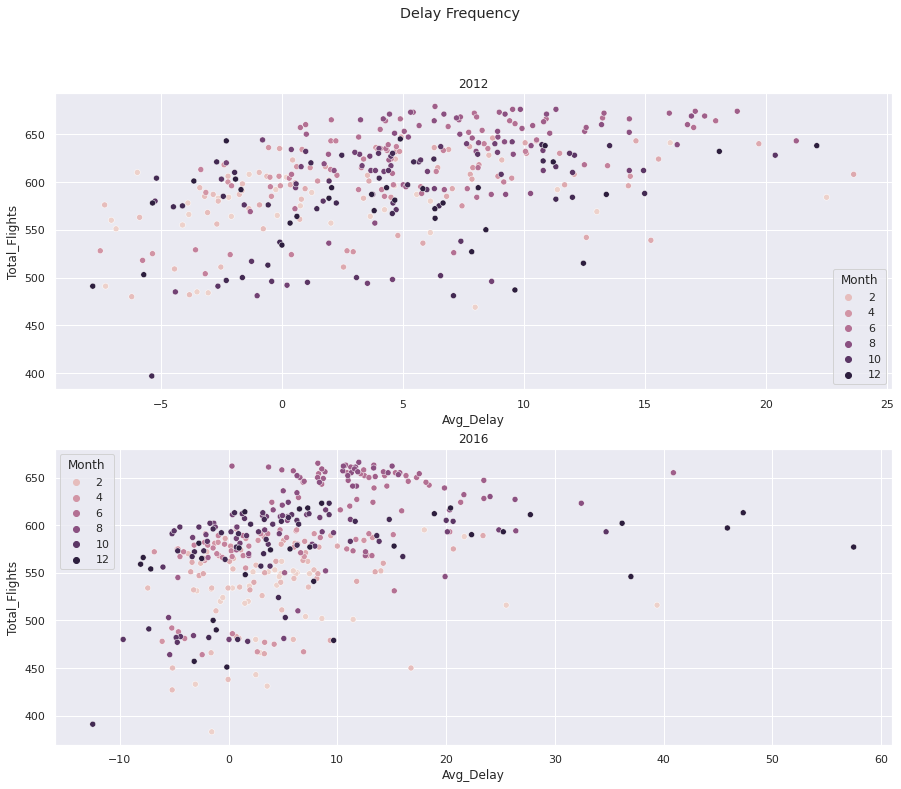

In [18]:
fig, axes = plt.subplots(2, 1)
fig.suptitle('Delay Frequency')
for i,yr in zip([0,1],[2012,2016]):
  air_viz = air_delay.copy()
  air_viz = air_viz.loc[air_viz['YEAR']==yr,:]
  air_viz['Date'] = pd.to_datetime({'year': air_viz['YEAR'],  'month': air_viz['MONTH'],'day' : air_viz['DAY_OF_MONTH']})
  air_viz = air_viz.groupby([air_viz['Date']]).mean()
  air_vv = pd.DataFrame()
  air_vv['Avg_Delay'] = air_viz['ARR_DELAY']
  air_viz = air_delay.copy()
  air_viz = air_viz.loc[air_viz['YEAR']==yr,:]
  air_viz['Date'] = pd.to_datetime({'year': air_viz['YEAR'],  'month': air_viz['MONTH'],'day' : air_viz['DAY_OF_MONTH']})
  air_viz = air_viz.groupby([air_viz['Date']]).count()
  air_vv['Total_Flights'] = air_viz['ARR_DELAY']
#air_vv['Delay'] = air_viz
  air_vv['Month'] = air_vv.index
  air_vv['Month'] = air_vv['Month'].dt.month
  sns.scatterplot(data=air_vv, x='Avg_Delay', y='Total_Flights', hue='Month',ax=axes[i])
  axes[i].set_title(str(yr))


In [19]:
air_vv['Month'] = air_vv.index
air_vv['Month'] = air_vv['Month'].dt.month

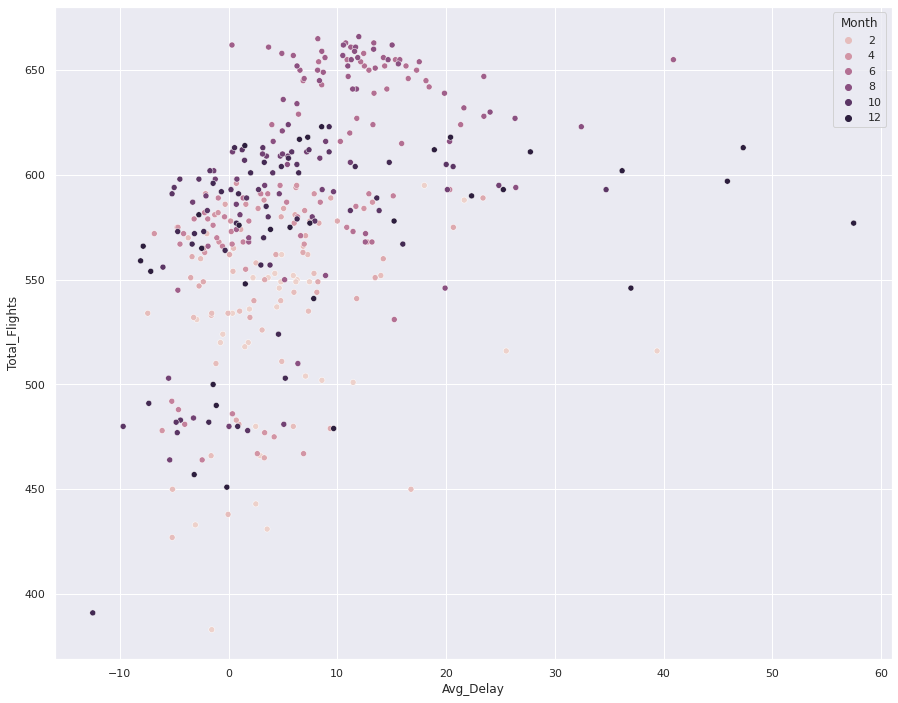

In [20]:
sns.scatterplot(data=air_vv, x='Avg_Delay', y='Total_Flights', hue='Month')

# Linear regression


In [22]:
from sklearn.linear_model import LogisticRegression
air_log = air_delay.copy()
air_log.head()
air_log.drop(columns=['CARRIER_DELAY', 'WEATHER_DELAY','NAS_DELAY','SECURITY_DELAY','LATE_AIRCRAFT_DELAY'], inplace=True )

In [23]:
from sklearn.preprocessing import OrdinalEncoder 
enc = OrdinalEncoder()
air_log = air_log.loc[air_log['YEAR']<=2017,:]
air_log[['OP_UNIQUE_CARRIER','YEAR']] = enc.fit_transform(air_log[['OP_UNIQUE_CARRIER','YEAR']])
air_log.head()

,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,TAIL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME
0,0.0,1,1,5,0.0,N3EVAA,LAX,ORD,1900-01-01 12:30:00,1226.0,-4.0,1900-01-01 18:45:00,1816.0,-29.0,255.0,230.0,209.0
1,0.0,1,2,6,0.0,N3EWAA,LAX,ORD,1900-01-01 12:30:00,1226.0,-4.0,1900-01-01 18:45:00,1818.0,-27.0,255.0,232.0,208.0
2,0.0,1,3,7,0.0,N3DTAA,LAX,ORD,1900-01-01 12:30:00,1229.0,-1.0,1900-01-01 18:45:00,1833.0,-12.0,255.0,244.0,211.0
3,0.0,1,4,1,0.0,N3EPAA,LAX,ORD,1900-01-01 12:30:00,1229.0,-1.0,1900-01-01 18:45:00,1932.0,47.0,255.0,303.0,239.0
4,0.0,1,5,2,0.0,N3DRAA,LAX,ORD,1900-01-01 12:30:00,1227.0,-3.0,1900-01-01 18:45:00,1844.0,-1.0,255.0,257.0,224.0


In [25]:
air_log['Delay'] = '0'
air_log.loc[(air_log['ARR_DELAY']<-5) & (air_log['ARR_DELAY']>= -20), 'Delay'] = '-1'
air_log.loc[(air_log['ARR_DELAY']<-20), 'Delay'] = '-2'
air_log.loc[(air_log['ARR_DELAY']>5) & (air_log['ARR_DELAY']<= 20), 'Delay'] = '1'
air_log.loc[(air_log['ARR_DELAY']>20), 'Delay'] = '2'
air_log.head()

,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,TAIL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,Delay
0,0.0,1,1,5,0.0,N3EVAA,LAX,ORD,1900-01-01 12:30:00,1226.0,-4.0,1900-01-01 18:45:00,1816.0,-29.0,255.0,230.0,209.0,-2
1,0.0,1,2,6,0.0,N3EWAA,LAX,ORD,1900-01-01 12:30:00,1226.0,-4.0,1900-01-01 18:45:00,1818.0,-27.0,255.0,232.0,208.0,-2
2,0.0,1,3,7,0.0,N3DTAA,LAX,ORD,1900-01-01 12:30:00,1229.0,-1.0,1900-01-01 18:45:00,1833.0,-12.0,255.0,244.0,211.0,-1
3,0.0,1,4,1,0.0,N3EPAA,LAX,ORD,1900-01-01 12:30:00,1229.0,-1.0,1900-01-01 18:45:00,1932.0,47.0,255.0,303.0,239.0,2
4,0.0,1,5,2,0.0,N3DRAA,LAX,ORD,1900-01-01 12:30:00,1227.0,-3.0,1900-01-01 18:45:00,1844.0,-1.0,255.0,257.0,224.0,0


In [26]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
feat_std = ['DEP_DELAY','CRS_ELAPSED_TIME']

air_log[feat_std] = scaler.fit_transform(air_log[feat_std])


In [27]:
air_log['Dep_hour'] = air_log['CRS_DEP_TIME'].dt.hour
air_log['Arr_hour'] = air_log['CRS_ARR_TIME'].dt.hour
air_log['Dep_min'] = air_log['CRS_DEP_TIME'].dt.minute
air_log['Arr_min'] = air_log['CRS_ARR_TIME'].dt.minute
air_log.head()

,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,TAIL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,Delay,Dep_hour,Arr_hour,Dep_min,Arr_min
0,0.0,1,1,5,0.0,N3EVAA,LAX,ORD,1900-01-01 12:30:00,1226.0,-0.400990,1900-01-01 18:45:00,1816.0,-29.0,0.805661,230.0,209.0,-2,12,18,30,45
1,0.0,1,2,6,0.0,N3EWAA,LAX,ORD,1900-01-01 12:30:00,1226.0,-0.400990,1900-01-01 18:45:00,1818.0,-27.0,0.805661,232.0,208.0,-2,12,18,30,45
2,0.0,1,3,7,0.0,N3DTAA,LAX,ORD,1900-01-01 12:30:00,1229.0,-0.311826,1900-01-01 18:45:00,1833.0,-12.0,0.805661,244.0,211.0,-1,12,18,30,45
3,0.0,1,4,1,0.0,N3EPAA,LAX,ORD,1900-01-01 12:30:00,1229.0,-0.311826,1900-01-01 18:45:00,1932.0,47.0,0.805661,303.0,239.0,2,12,18,30,45
4,0.0,1,5,2,0.0,N3DRAA,LAX,ORD,1900-01-01 12:30:00,1227.0,-0.371269,1900-01-01 18:45:00,1844.0,-1.0,0.805661,257.0,224.0,0,12,18,30,45


In [28]:
X_train, X_test, y_train, y_test = train_test_split(
    air_log.drop(columns=['DEP_DELAY','OP_UNIQUE_CARRIER','ORIGIN','DEST','CRS_DEP_TIME','CRS_ARR_TIME','DEP_TIME','ARR_DELAY','ACTUAL_ELAPSED_TIME','AIR_TIME','ARR_TIME','Arr_hour','Arr_min','TAIL_NUM','Delay']), air_log.loc[:,['ARR_DELAY']], test_size=0.25)
#    air_delay.loc[:,['DAY','MONTH','YEAR','Week day','DEP_DELAY','AIR_TIME','dep_ord']], air_delay.iloc[:,8], test_size=0.25, random_state=1)
X_train.head()
y_train = np.array(y_train).reshape(-1,1)
y_test = np.array(y_test).reshape(-1,1)

X_train

,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,CRS_ELAPSED_TIME,Dep_hour,Dep_min
1034479,4.0,11,25,2,-0.940949,6,30
519948,2.0,7,16,1,-1.010416,11,47
967768,4.0,7,18,5,-1.218819,15,9
308065,1.0,7,30,6,0.160606,6,25
742236,3.0,7,17,3,-1.030264,9,40
...,...,...,...,...,...,...,...
868521,4.0,2,3,1,1.490412,8,35
1338555,6.0,4,28,4,-0.861558,11,0
866457,4.0,2,14,5,-1.248590,7,25
454113,2.0,3,27,2,1.688890,17,59


In [30]:
from sklearn.metrics import *

In [31]:
lg = LinearRegression()
lg.fit(X_train,y_train)
pred = lg.predict(X_test)
print('Variance: ', explained_variance_score(y_test,pred))
print('MAE: ', mean_absolute_error(y_test,pred))
print('RMSE: ', mean_squared_error(y_test,pred, squared = False))

Variance:  0.008161625071393619
MAE:  19.872098570553447
RMSE:  35.572646389598866


In [32]:
from mlxtend.feature_selection import SequentialFeatureSelector

In [33]:
sfs = SequentialFeatureSelector(lg,
                                k_features=5,
                                forward=True,
                                floating=False,
                                verbose=2,
                                scoring='neg_mean_absolute_error',
                                cv=5)

In [34]:
sfs = sfs.fit(X_train,y_train)
feat_cols= list(sfs.k_feature_idx_)
print(feat_cols)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    1.9s finished

[2021-08-20 09:07:23] Features: 1/5 -- score: -19.788546702047604[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    4.7s finished

[2021-08-20 09:07:27] Features: 2/5 -- score: -19.785539708510612[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    4.6s finished

[2021-08-20 09:07:32] Features: 3/5 -- score: -19.784714223615744[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

[0, 1, 2, 3, 5]


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    3.7s finished

[2021-08-20 09:07:40] Features: 5/5 -- score: -19.78378739879026

In [35]:
feat_cols= list(sfs.k_feature_idx_)
print(feat_cols)

[0, 1, 2, 3, 5]


In [36]:
for i in range(1,4):
  print(i)
  poly = PolynomialFeatures(degree = i)
  X_poly = poly.fit_transform(X_train)
#  poly.fit(X_poly, y_train)

  lin2 = LinearRegression()
  lin2.fit(X_poly, y_train)
  poly_test = poly.transform(X_test)
  pred = lin2.predict(poly_test)
  print('Variance: ', explained_variance_score(y_test,pred))
  print('MAE: ', mean_absolute_error(y_test,pred))
  print(metrics.mean_squared_error(pred,y_test, squared=False))


1
Variance:  0.008161625071393619
MAE:  19.872098570553447
35.57264638959887
2
Variance:  0.013664006637528425
MAE:  19.80548015302632
35.47383415926626
3
Variance:  0.018120290830129115
MAE:  19.744640665563665
35.393605322340925


# Pipeline

In [37]:
air_pipe = air_delay.copy()
air_pipe.head()
air_pipe.drop(columns=['CARRIER_DELAY', 'WEATHER_DELAY','NAS_DELAY','SECURITY_DELAY','LATE_AIRCRAFT_DELAY'], inplace=True )

In [38]:
air_pipe['Dep_hour'] = air_pipe['CRS_DEP_TIME'].dt.hour
air_pipe['Arr_hour'] = air_pipe['CRS_ARR_TIME'].dt.hour
air_pipe['Dep_min'] = air_pipe['CRS_DEP_TIME'].dt.minute
air_pipe['Arr_min'] = air_pipe['CRS_ARR_TIME'].dt.minute
air_pipe.head()

,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,TAIL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,Dep_hour,Arr_hour,Dep_min,Arr_min
0,2010,1,1,5,AA,N3EVAA,LAX,ORD,1900-01-01 12:30:00,1226.0,-4.0,1900-01-01 18:45:00,1816.0,-29.0,255.0,230.0,209.0,12,18,30,45
1,2010,1,2,6,AA,N3EWAA,LAX,ORD,1900-01-01 12:30:00,1226.0,-4.0,1900-01-01 18:45:00,1818.0,-27.0,255.0,232.0,208.0,12,18,30,45
2,2010,1,3,7,AA,N3DTAA,LAX,ORD,1900-01-01 12:30:00,1229.0,-1.0,1900-01-01 18:45:00,1833.0,-12.0,255.0,244.0,211.0,12,18,30,45
3,2010,1,4,1,AA,N3EPAA,LAX,ORD,1900-01-01 12:30:00,1229.0,-1.0,1900-01-01 18:45:00,1932.0,47.0,255.0,303.0,239.0,12,18,30,45
4,2010,1,5,2,AA,N3DRAA,LAX,ORD,1900-01-01 12:30:00,1227.0,-3.0,1900-01-01 18:45:00,1844.0,-1.0,255.0,257.0,224.0,12,18,30,45


In [39]:
air_pipe = air_pipe.loc[air_pipe['ARR_DELAY']<60,:]

In [40]:
X_train, X_test, y_train, y_test = train_test_split(
    air_pipe.drop(columns=['ORIGIN','DEST','CRS_DEP_TIME','CRS_ARR_TIME','DEP_TIME','ARR_DELAY','ACTUAL_ELAPSED_TIME','AIR_TIME','ARR_TIME','Arr_hour','Arr_min','TAIL_NUM']), air_pipe.loc[:,['ARR_DELAY']], test_size=0.25)

y_train = np.array(y_train).reshape(-1,1)
y_test = np.array(y_test).reshape(-1,1)

X_train

,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,DEP_DELAY,CRS_ELAPSED_TIME,Dep_hour,Dep_min
1964613,2019,3,17,7,OO,-5.0,99.0,6,40
312412,2011,7,5,2,UA,-3.0,85.0,10,40
2114301,2019,11,12,2,AS,-4.0,294.0,12,55
1748832,2018,3,20,2,DL,-2.0,340.0,21,55
8789,2010,1,4,1,AS,-5.0,170.0,15,30
...,...,...,...,...,...,...,...,...,...
847060,2014,1,4,6,AA,14.0,290.0,22,45
896610,2014,3,11,2,MQ,0.0,100.0,19,35
792899,2013,10,11,5,OO,-3.0,85.0,8,50
1706303,2018,1,17,3,AA,19.0,106.0,18,30


In [41]:
numeric_features = ['DEP_DELAY','CRS_ELAPSED_TIME']
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

categorical_features = ['OP_UNIQUE_CARRIER']
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

ordinal_features = ['YEAR']
ordinal_transformer = OrdinalEncoder()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features),
        ('ord', ordinal_transformer, ordinal_features),])

lin_pipe = Pipeline(steps=[('preprocessor', preprocessor),
                         ('classifier', LinearRegression())])

lin_pipe.fit(X_train, y_train)

pred = lin_pipe.predict(X_test)
print("model train score: %.3f" % lin_pipe.score(X_train, y_train))
print("R^2 score: %.3f" % lin_pipe.score(X_test, y_test))
print('Variance: ', explained_variance_score(y_test,pred))
print('MAE: ', mean_absolute_error(y_test,pred))
print(metrics.mean_squared_error(pred,y_test, squared=False))
  

model train score: 0.562
R^2 score: 0.564
Variance:  0.5635883135954198
MAE:  8.580564008588786
11.556083044648352


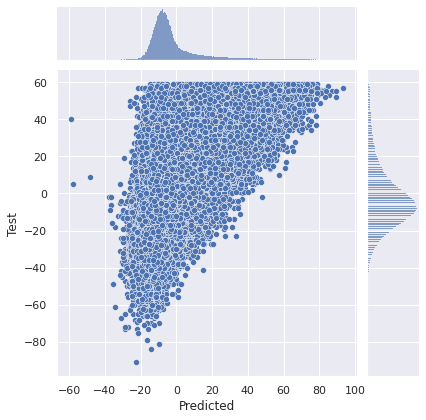

In [42]:
df_plot = pd.DataFrame(data=pred, columns=['Predicted'])
df_plot['Test'] = y_test
sns.set(rc = {'figure.figsize':(15,12)})
sns.jointplot(data=df_plot , x='Predicted', y='Test')

# Decision Tree

In [43]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
import graphviz 
import seaborn as sns

In [44]:
X_train, X_test, y_train, y_test = train_test_split(
    air_pipe.drop(columns=['ORIGIN','DEST','CRS_DEP_TIME','CRS_ARR_TIME','DEP_TIME','ARR_DELAY','ACTUAL_ELAPSED_TIME','AIR_TIME','ARR_TIME','Arr_hour','Arr_min','TAIL_NUM']), air_pipe.loc[:,['ARR_DELAY']], test_size=0.25)

y_train = np.array(y_train).reshape(-1,1)
y_test = np.array(y_test).reshape(-1,1)

X_train

,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,DEP_DELAY,CRS_ELAPSED_TIME,Dep_hour,Dep_min
320747,2011,8,25,4,WN,62.0,80.0,21,5
1565743,2017,5,5,5,UA,-5.0,90.0,10,15
1906683,2018,12,2,7,OO,-7.0,52.0,11,30
1605543,2017,7,20,4,B6,4.0,330.0,7,0
1314689,2016,3,14,1,AA,-4.0,184.0,9,35
...,...,...,...,...,...,...,...,...,...
222800,2011,2,27,7,UA,8.0,237.0,11,5
559471,2012,9,3,1,OO,-5.0,46.0,22,29
1519058,2017,3,7,2,DL,2.0,364.0,16,55
2024856,2019,7,28,7,WN,13.0,80.0,11,35


In [45]:
numeric_features = ['DEP_DELAY','CRS_ELAPSED_TIME']
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

categorical_features = ['OP_UNIQUE_CARRIER']
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

ordinal_features = ['YEAR']
ordinal_transformer = OrdinalEncoder()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features),
        ('ord', ordinal_transformer, ordinal_features),])

rf_pipe = Pipeline(steps=[('preprocessor', preprocessor),
                         ('regressor',  DecisionTreeRegressor())])

rf_pipe.fit(X_train, y_train)

pred = rf_pipe.predict(X_test)
print("model Train score: %.3f" % rf_pipe.score(X_train, y_train))
print("R^2 score: %.3f" % rf_pipe.score(X_test, y_test))
print('Variance: ', explained_variance_score(y_test,pred))
print('MAE: ', mean_absolute_error(y_test,pred))
print(metrics.mean_squared_error(pred,y_test, squared=False))
  

model Train score: 0.705
R^2 score: 0.487
Variance:  0.4865334667599124
MAE:  9.122099171230476
12.519055147238142


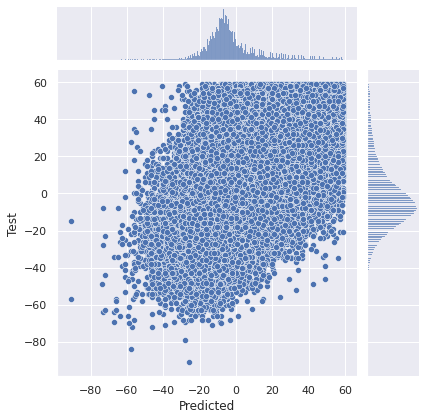

In [46]:
df_plot = pd.DataFrame(data=pred, columns=['Predicted'])
df_plot['Test'] = y_test
sns.set(rc = {'figure.figsize':(15,12)})
sns.jointplot(data=df_plot , x='Predicted', y='Test')

# Polynomial

In [47]:
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD

In [48]:
air_pipe = air_pipe.loc[air_pipe['ARR_DELAY']<60,:]

In [49]:
X_train, X_test, y_train, y_test = train_test_split(
    air_pipe.drop(columns=['ORIGIN','CRS_DEP_TIME','CRS_ARR_TIME','DEP_TIME','ARR_DELAY','ACTUAL_ELAPSED_TIME','AIR_TIME','ARR_TIME','Arr_hour','Arr_min','TAIL_NUM']), air_pipe.loc[:,['ARR_DELAY']], test_size=0.3)

y_train = np.array(y_train).reshape(-1,1)
y_test = np.array(y_test).reshape(-1,1)

X_train

,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,DEST,DEP_DELAY,CRS_ELAPSED_TIME,Dep_hour,Dep_min
1520977,2017,3,8,3,AA,MSP,-7.0,230.0,9,55
2035719,2019,7,24,3,OO,SUN,-9.0,139.0,16,35
1378998,2016,7,27,3,DL,OGG,-3.0,340.0,17,45
348162,2011,9,22,4,UA,SFO,0.0,76.0,19,34
1665200,2017,11,4,6,AA,MIA,-4.0,310.0,6,0
...,...,...,...,...,...,...,...,...,...,...
127453,2010,8,24,2,AA,EWR,-1.0,335.0,8,50
1343448,2016,5,26,4,UA,PHX,-7.0,88.0,20,10
90821,2010,6,27,7,UA,SFO,0.0,84.0,6,0
1820283,2018,7,15,7,AA,PHX,-2.0,86.0,16,40


In [50]:
numeric_features = ['DEP_DELAY','CRS_ELAPSED_TIME']
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

categorical_features = ['OP_UNIQUE_CARRIER','DEST']
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

ordinal_features = ['YEAR']
ordinal_transformer = OrdinalEncoder()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features),
        ('ord', ordinal_transformer, ordinal_features),])

pca_pipe = Pipeline(steps=[('preprocessor', preprocessor),
                           ('pca', TruncatedSVD(5)),
                           ('poly', PolynomialFeatures(3)),
                           ('classifier', LinearRegression())])



In [51]:
pca_pipe.fit(X_train, y_train)

pred = pca_pipe.predict(X_test)
print("model train score: %.3f" % pca_pipe.score(X_train, y_train))
print("R^2 score: %.3f" % pca_pipe.score(X_test, y_test))
print('R^2 Value: ', r2_score(y_test,pred))
print('Variance: ', explained_variance_score(y_test,pred))
print('MAE: ', mean_absolute_error(y_test,pred))
print(metrics.mean_squared_error(pred,y_test, squared=False))
  

model train score: 0.569
R^2 score: 0.567
R^2 Value:  0.5667107041761492
Variance:  0.5667107981579543
MAE:  8.507905057651731
11.484536280735895


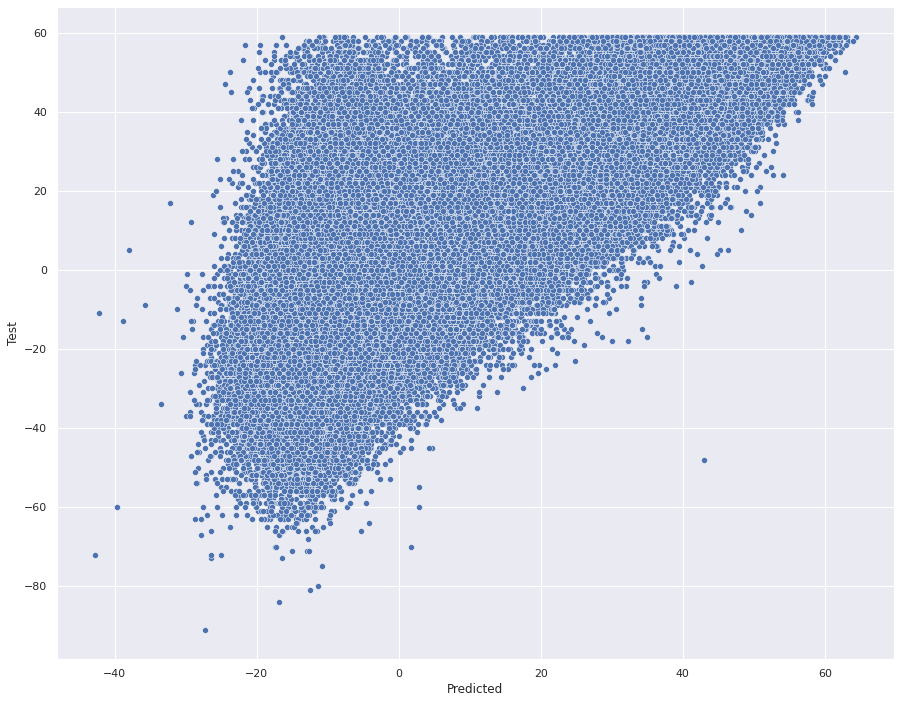

In [52]:
df_plot = pd.DataFrame(data=pred, columns=['Predicted'])
df_plot['Test'] = y_test
sns.set(rc = {'figure.figsize':(15,12)})
sns.scatterplot(data=df_plot , x='Predicted', y='Test')

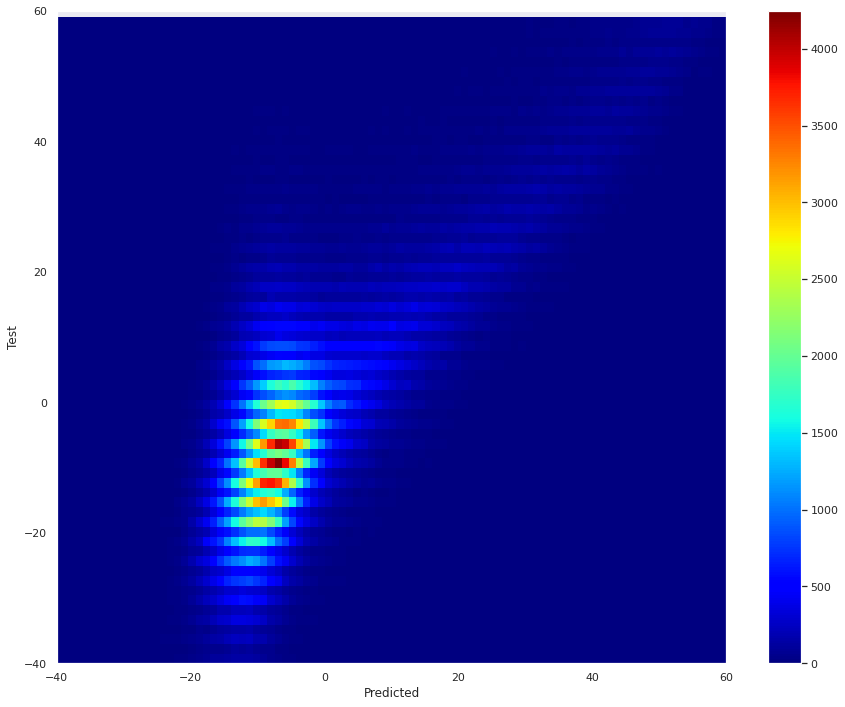

In [53]:
plt.hist2d(data=df_plot , x='Predicted', y='Test',bins =  [100, 100], cmap=plt.cm.jet)
plt.xlim(-40,60)
plt.ylim(-40,60)
plt.xlabel('Predicted')
plt.ylabel('Test')
plt.colorbar()

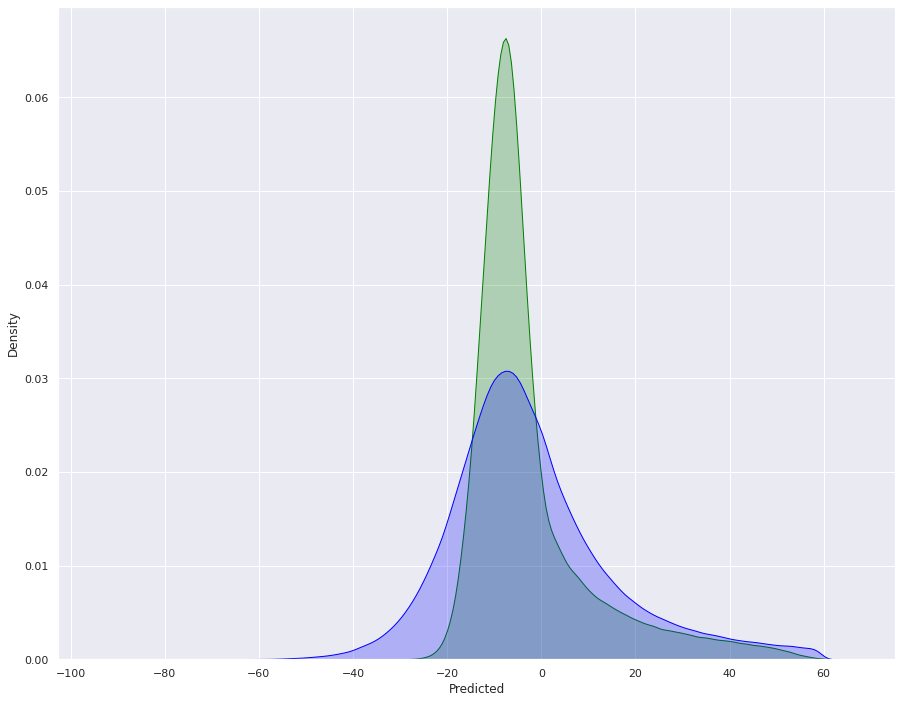

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.kdeplot(df_plot['Predicted'], color="green", shade=True)
sns.kdeplot(df_plot['Test'], color="blue", shade=True)
plt.show()

In [55]:
param_grid_pca_pipe = { 'pca__n_components': [1,2,3,4,5],
                        'poly__degree': [1,2,3]           }

grid_search_nb = GridSearchCV(pca_pipe, param_grid_pca_pipe,scoring='neg_mean_absolute_error')

In [56]:
grid_search_nb.fit(X_train, y_train)

print(f"Best params:")
print(grid_search_nb.best_params_)

results_nb = pd.DataFrame(grid_search_nb.cv_results_)

print(tabulate(results_nb, headers='keys', tablefmt='psq1'))

Best params:
{'pca__n_components': 5, 'poly__degree': 3}
      mean_fit_time    std_fit_time    mean_score_time    std_score_time    param_pca__n_components    param_poly__degree  params                                         split0_test_score    split1_test_score    split2_test_score    split3_test_score    split4_test_score    mean_test_score    std_test_score    rank_test_score
--  ---------------  --------------  -----------------  ----------------  -------------------------  --------------------  -------------------------------------------  -------------------  -------------------  -------------------  -------------------  -------------------  -----------------  ----------------  -----------------
 0          4.80074       0.017519            0.321681         0.0199874                          1                     1  {'pca__n_components': 1, 'poly__degree': 1}            -12.9809             -13.0046             -12.959              -13.0201             -12.9602           -12.98

In [57]:
pred = grid_search_nb.best_estimator_.predict(X_test)

print("model train score: %.3f" % grid_search_nb.best_estimator_.score(X_train, y_train))
print("R^2 score: %.3f" % grid_search_nb.best_estimator_.score(X_test, y_test))
print('Variance: ', explained_variance_score(y_test,pred))
print('MAE: ', mean_absolute_error(y_test,pred))
print(metrics.mean_squared_error(pred,y_test, squared=False))
  

model train score: 0.569
R^2 score: 0.567
Variance:  0.566710298829331
MAE:  8.507903866245869
11.484542883490128


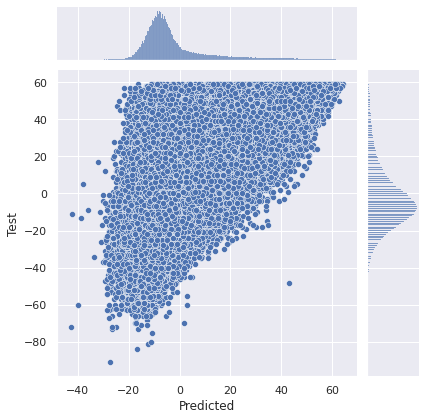

In [58]:
df_plot = pd.DataFrame(data=pred, columns=['Predicted'])
df_plot['Test'] = y_test
sns.set(rc = {'figure.figsize':(15,12)})
sns.jointplot(data=df_plot , x='Predicted', y='Test')

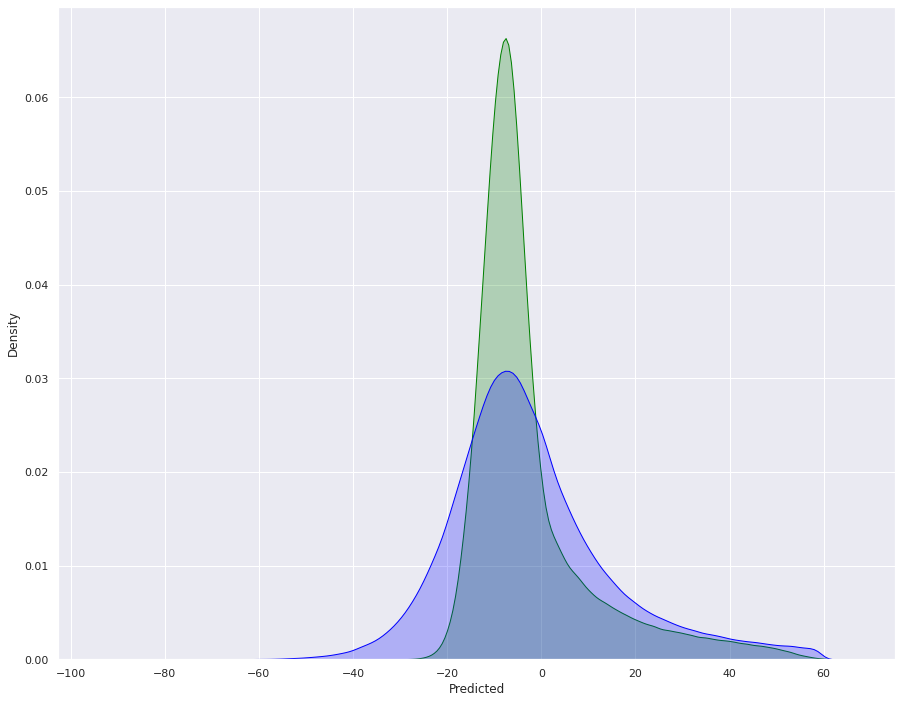

In [59]:
sns.kdeplot(df_plot['Predicted'], color="green", shade=True)
sns.kdeplot(df_plot['Test'], color="blue", shade=True)
plt.show()

# XG Boost

In [60]:
import xgboost as xgb
from xgboost import plot_importance

In [61]:
numeric_features = ['DEP_DELAY','CRS_ELAPSED_TIME']
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

categorical_features = ['OP_UNIQUE_CARRIER','DEST']
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

ordinal_features = ['YEAR']
ordinal_transformer = OrdinalEncoder()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features),
        ('ord', ordinal_transformer, ordinal_features),])

pca_pipe = Pipeline(steps=[('preprocessor', preprocessor),
                           ('pca', TruncatedSVD(5)),
                           ('classifier',  xgb.XGBRegressor())])



In [62]:
pca_pipe.fit(X_train, y_train)

pred = pca_pipe.predict(X_test)
print("model train score: %.3f" % pca_pipe.score(X_train, y_train))
print("R^2 score: %.3f" % pca_pipe.score(X_test, y_test))
print('R^2 Value: ', r2_score(y_test,pred))
print('Variance: ', explained_variance_score(y_test,pred))
print('MAE: ', mean_absolute_error(y_test,pred))
print(metrics.mean_squared_error(pred,y_test, squared=False))
  

[09:25:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
model train score: 0.573
R^2 score: 0.571
R^2 Value:  0.5712429057338596
Variance:  0.5712429145642393
MAE:  8.45263007128844
11.424314321067502


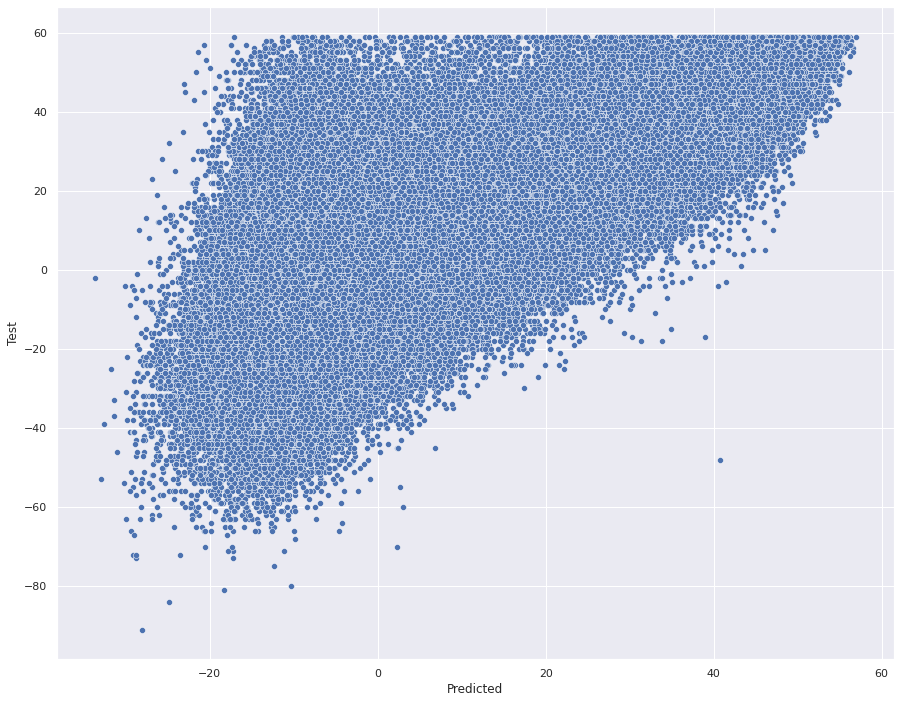

In [63]:
df_plot = pd.DataFrame(data=pred, columns=['Predicted'])
df_plot['Test'] = y_test
sns.set(rc = {'figure.figsize':(15,12)})
sns.scatterplot(data=df_plot , x='Predicted', y='Test')

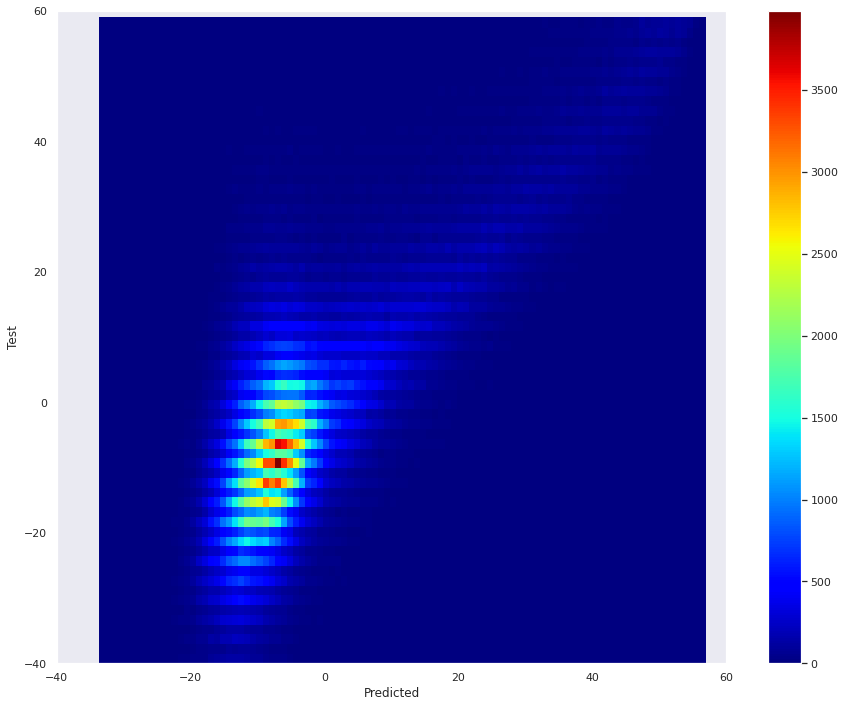

In [64]:
plt.hist2d(data=df_plot , x='Predicted', y='Test',bins =  [100, 100], cmap=plt.cm.jet)
plt.xlim(-40,60)
plt.ylim(-40,60)
plt.xlabel('Predicted')
plt.ylabel('Test')
plt.colorbar()

# Delay Reason Classification

In [65]:
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.multioutput import MultiOutputClassifier
from sklearn.multiclass import OneVsRestClassifier

In [66]:
from sklearn.linear_model import LogisticRegression
air_multi = air_delay.copy()

In [67]:
air_multi['Dep_hour'] = air_multi['CRS_DEP_TIME'].dt.hour
air_multi['Arr_hour'] = air_multi['CRS_ARR_TIME'].dt.hour
air_multi['Dep_min'] = air_multi['CRS_DEP_TIME'].dt.minute
air_multi['Arr_min'] = air_multi['CRS_ARR_TIME'].dt.minute

In [68]:
air_multi['carr_delay'] = False
air_multi['weather_delay'] = False
air_multi['nas_delay'] = False
air_multi['security_delay'] = False
air_multi['late_air_delay'] = False
air_multi.loc[(air_multi['CARRIER_DELAY']>0), 'carr_delay'] = True
air_multi.loc[(air_multi['WEATHER_DELAY']>0), 'weather_delay'] = True
air_multi.loc[(air_multi['NAS_DELAY']>0), 'nas_delay'] = True
air_multi.loc[(air_multi['SECURITY_DELAY']>0), 'security_delay'] = True
air_multi.loc[(air_multi['LATE_AIRCRAFT_DELAY']>0), 'late_air_delay'] = True

## Carrier Delay

In [69]:
n =len(air_multi.loc[(air_multi['carr_delay'] == True), :])

226103

In [70]:
air_new = air_multi.loc[(air_multi['carr_delay'] == False), :].sample(n)
air_new = air_new.append(air_multi.loc[(air_multi['carr_delay'] == True), :],)
air_new =air_new.sample(frac=1).reset_index(drop=True)

,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,TAIL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Dep_hour,Arr_hour,Dep_min,Arr_min,carr_delay,weather_delay,nas_delay,security_delay,late_air_delay
0,2012,8,20,1,DL,N706TW,LAX,JFK,1900-01-01 21:30:00,2143.0,13.0,1900-01-01 05:45:00,616.0,31.0,315.0,333.0,286.0,6.0,0.0,18.0,0.0,7.0,21,5,30,45,True,False,True,False,True
1,2012,7,7,6,AA,N3HJAA,LAX,MIA,1900-01-01 21:15:00,2114.0,-1.0,1900-01-01 05:25:00,525.0,0.0,310.0,311.0,280.0,0.0,0.0,0.0,0.0,0.0,21,5,15,25,False,False,False,False,False
2,2013,4,12,5,WN,N364SW,LAX,OAK,1900-01-01 06:05:00,601.0,-4.0,1900-01-01 07:25:00,729.0,4.0,80.0,88.0,61.0,0.0,0.0,0.0,0.0,0.0,6,7,5,25,False,False,False,False,False
3,2015,11,19,4,DL,N816DN,LAX,ATL,1900-01-01 22:40:00,2240.0,0.0,1900-01-01 05:51:00,541.0,-10.0,251.0,241.0,211.0,0.0,0.0,0.0,0.0,0.0,22,5,40,51,False,False,False,False,False
4,2012,3,29,4,UA,N546UA,LAX,OGG,1900-01-01 18:42:00,2103.0,141.0,1900-01-01 21:28:00,2310.0,102.0,346.0,307.0,287.0,9.0,0.0,0.0,0.0,93.0,18,21,42,28,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
452201,2010,1,19,2,DL,N723TW,LAX,JFK,1900-01-01 12:45:00,1250.0,5.0,1900-01-01 21:15:00,2109.0,-6.0,330.0,319.0,286.0,0.0,0.0,0.0,0.0,0.0,12,21,45,15,False,False,False,False,False
452202,2010,12,2,4,MQ,N850MQ,LAX,SBA,1900-01-01 16:35:00,1632.0,-3.0,1900-01-01 17:15:00,1717.0,2.0,40.0,45.0,19.0,0.0,0.0,0.0,0.0,0.0,16,17,35,15,False,False,False,False,False
452203,2010,4,13,2,F9,N937FR,LAX,DEN,1900-01-01 09:10:00,904.0,-6.0,1900-01-01 12:24:00,1215.0,-9.0,134.0,131.0,107.0,0.0,0.0,0.0,0.0,0.0,9,12,10,24,False,False,False,False,False
452204,2014,6,19,4,UA,N441UA,LAX,ORD,1900-01-01 23:20:00,252.0,212.0,1900-01-01 05:20:00,902.0,222.0,240.0,250.0,220.0,62.0,0.0,10.0,0.0,150.0,23,5,20,20,True,False,True,False,True


In [71]:
X_train, X_test, y_train, y_test = train_test_split(
    air_new.drop(columns=['ORIGIN','DEST','CRS_DEP_TIME','CRS_ARR_TIME','DEP_TIME','ARR_DELAY','ACTUAL_ELAPSED_TIME','AIR_TIME','ARR_TIME','Arr_hour','Arr_min','TAIL_NUM','CARRIER_DELAY', 'WEATHER_DELAY','NAS_DELAY','SECURITY_DELAY','LATE_AIRCRAFT_DELAY','carr_delay',	'weather_delay',	'nas_delay',	'security_delay',	'late_air_delay']), air_new.loc[:,['carr_delay']], test_size=0.3)

,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,DEP_DELAY,CRS_ELAPSED_TIME,Dep_hour,Dep_min
202382,2019,11,27,3,AS,-8.0,153.0,17,40
397341,2016,11,6,7,DL,34.0,218.0,6,30
362871,2016,9,2,5,WN,17.0,175.0,9,0
234415,2013,5,18,6,UA,-18.0,329.0,7,0
216625,2017,9,18,1,B6,38.0,322.0,16,40
...,...,...,...,...,...,...,...,...,...
45050,2016,11,5,6,WN,6.0,180.0,7,20
100754,2014,6,29,7,OO,6.0,80.0,20,35
35455,2018,2,26,1,UA,1.0,238.0,14,5
282798,2020,7,13,1,DL,30.0,156.0,7,45


### Logistic

In [72]:
metrics_report = []

In [73]:
numeric_features = ['DEP_DELAY','CRS_ELAPSED_TIME']
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

categorical_features = ['OP_UNIQUE_CARRIER']
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

ordinal_features = ['YEAR']
ordinal_transformer = OrdinalEncoder()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features),
        ('ord', ordinal_transformer, ordinal_features),])

lin_pipe = Pipeline(steps=[('preprocessor', preprocessor),
                          ('pca',TruncatedSVD(n_components=5)),
                         ('classifier', LogisticRegression())])

lin_pipe.fit(X_train, y_train)

pred = lin_pipe.predict(X_test)
print("Model Train score: %.3f" % lin_pipe.score(X_train, y_train))
print("Accuracy score: %.3f" % lin_pipe.score(X_test, y_test))



  

Model Train score: 0.872
Accuracy score: 0.871


              precision    recall  f1-score   support

       False       0.85      0.91      0.88     67942
        True       0.90      0.83      0.87     67720

    accuracy                           0.87    135662
   macro avg       0.87      0.87      0.87    135662
weighted avg       0.87      0.87      0.87    135662

True Positivity Rate/Sensitivity : 0.8338895451860603
True Negative Rate/Specificity :  0.9076418121338788
Confusion Matrix :  [[61667  6275]
 [11249 56471]]


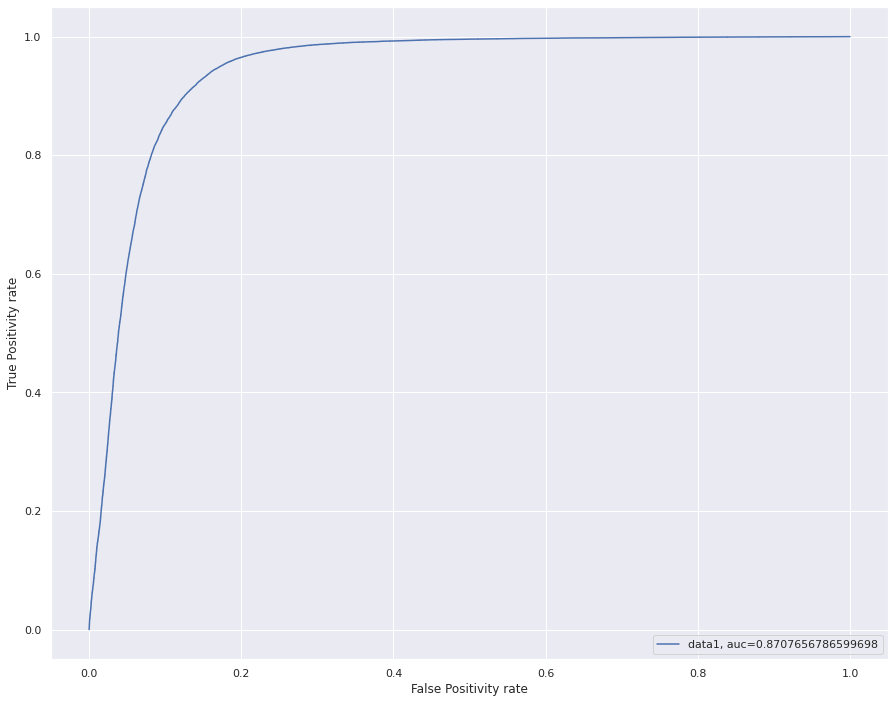

In [74]:
pred = lin_pipe.predict(X_test)
pre_prob = lin_pipe.predict_proba(X_test)[::,1]
print(classification_report(y_test,pred))

tn, fp, fn, tp = confusion_matrix(y_test,pred).ravel()
fpr,tpr, th = metrics.roc_curve(y_test,pre_prob)
print('True Positivity Rate/Sensitivity :', tp/(tp+fn))
print('True Negative Rate/Specificity : ', tn/(tn+fp))
auc = metrics.roc_auc_score(y_test,pred)

metrics_report.append(['Logistic Regression',str(classification_report(y_test,pred)), fpr,tpr,auc])

print('Confusion Matrix : ',confusion_matrix(y_test,pred))
plt.plot(fpr,tpr,label='data1, auc='+str(auc))
plt.legend(loc=4)
plt.xlabel('False Positivity rate')
plt.ylabel('True Positivity rate')

plt.show()

### Decision Tree Classifier

In [75]:
numeric_features = ['DEP_DELAY','CRS_ELAPSED_TIME']
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

categorical_features = ['OP_UNIQUE_CARRIER']
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

ordinal_features = ['YEAR']
ordinal_transformer = OrdinalEncoder()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features),
        ('ord', ordinal_transformer, ordinal_features),])

lin_pipe = Pipeline(steps=[('preprocessor', preprocessor),
                         ('classifier', DecisionTreeClassifier())])

lin_pipe.fit(X_train, y_train)

pred = lin_pipe.predict(X_test)
print("Model Train score: %.3f" % lin_pipe.score(X_train, y_train))
print("Accuracy score: %.3f" % lin_pipe.score(X_test, y_test))






Model Train score: 0.965
Accuracy score: 0.853


              precision    recall  f1-score   support

       False       0.85      0.86      0.85     67942
        True       0.86      0.84      0.85     67720

    accuracy                           0.85    135662
   macro avg       0.85      0.85      0.85    135662
weighted avg       0.85      0.85      0.85    135662

True Positivity Rate/Sensitivity : 0.8441228588304784
True Negative Rate/Specificity :  0.861690853963675
Confusion Matrix :  [[58545  9397]
 [10556 57164]]


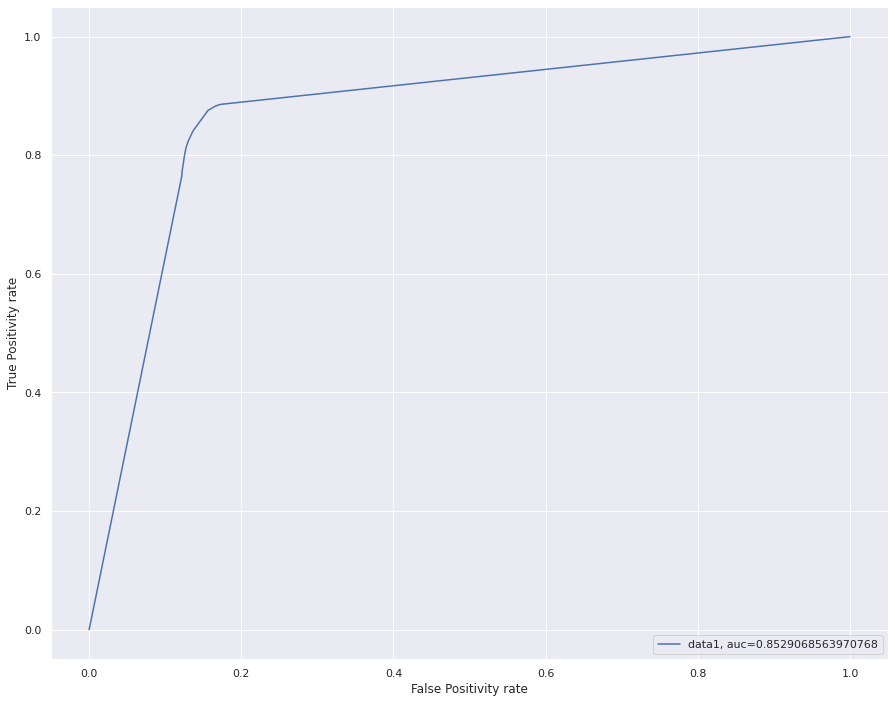

In [76]:
pred = lin_pipe.predict(X_test)
pre_prob = lin_pipe.predict_proba(X_test)[::,1]
print(classification_report(y_test,pred))

tn, fp, fn, tp = confusion_matrix(y_test,pred).ravel()
fpr,tpr, th = metrics.roc_curve(y_test,pre_prob)
print('True Positivity Rate/Sensitivity :', tp/(tp+fn))
print('True Negative Rate/Specificity : ', tn/(tn+fp))
auc = metrics.roc_auc_score(y_test,pred)

print('Confusion Matrix : ',confusion_matrix(y_test,pred))

metrics_report.append(['Decision Tree Classification',str(classification_report(y_test,pred)), fpr,tpr,auc])

plt.plot(fpr,tpr,label='data1, auc='+str(auc))
plt.legend(loc=4)
plt.xlabel('False Positivity rate')
plt.ylabel('True Positivity rate')

plt.show()

### XG Boost

In [77]:
numeric_features = ['DEP_DELAY','CRS_ELAPSED_TIME']
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

categorical_features = ['OP_UNIQUE_CARRIER']
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

ordinal_features = ['YEAR']
ordinal_transformer = OrdinalEncoder()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features),
        ('ord', ordinal_transformer, ordinal_features),])

lin_pipe = Pipeline(steps=[('preprocessor', preprocessor),
                         ('classifier', xgb.XGBRFClassifier())])

lin_pipe.fit(X_train, y_train)

pred = lin_pipe.predict(X_test)
print("Model Train score: %.3f" % lin_pipe.score(X_train, y_train))
print("Accuracy score: %.3f" % lin_pipe.score(X_test, y_test))






Model Train score: 0.892
Accuracy score: 0.890


              precision    recall  f1-score   support

       False       0.94      0.83      0.88     67942
        True       0.85      0.95      0.90     67720

    accuracy                           0.89    135662
   macro avg       0.90      0.89      0.89    135662
weighted avg       0.90      0.89      0.89    135662

True Positivity Rate/Sensitivity : 0.9488038984051979
True Negative Rate/Specificity :  0.8317388360660564
Confusion Matrix :  [[56510 11432]
 [ 3467 64253]]


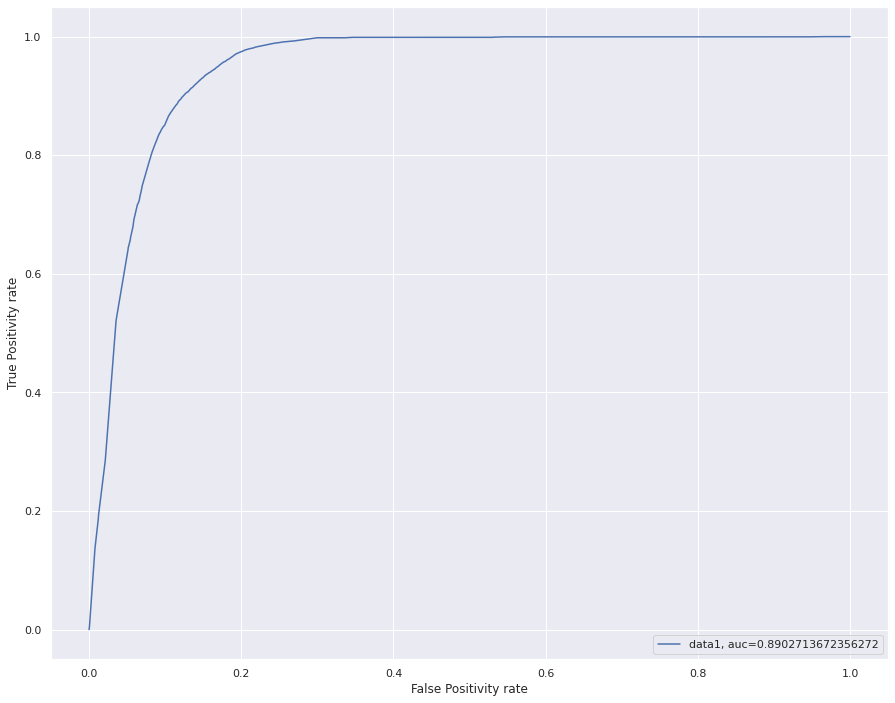

In [78]:
pred = lin_pipe.predict(X_test)
pre_prob = lin_pipe.predict_proba(X_test)[::,1]
print(classification_report(y_test,pred))

tn, fp, fn, tp = confusion_matrix(y_test,pred).ravel()
fpr,tpr, th = metrics.roc_curve(y_test,pre_prob)
print('True Positivity Rate/Sensitivity :', tp/(tp+fn))
print('True Negative Rate/Specificity : ', tn/(tn+fp))
auc = metrics.roc_auc_score(y_test,pred)

print('Confusion Matrix : ',confusion_matrix(y_test,pred))

metrics_report.append(['XGBoost Classification',str(classification_report(y_test,pred)), fpr,tpr,auc])

plt.plot(fpr,tpr,label='data1, auc='+str(auc))
plt.legend(loc=4)
plt.xlabel('False Positivity rate')
plt.ylabel('True Positivity rate')

plt.show()

Text(0, 0.5, 'True Positivity rate')

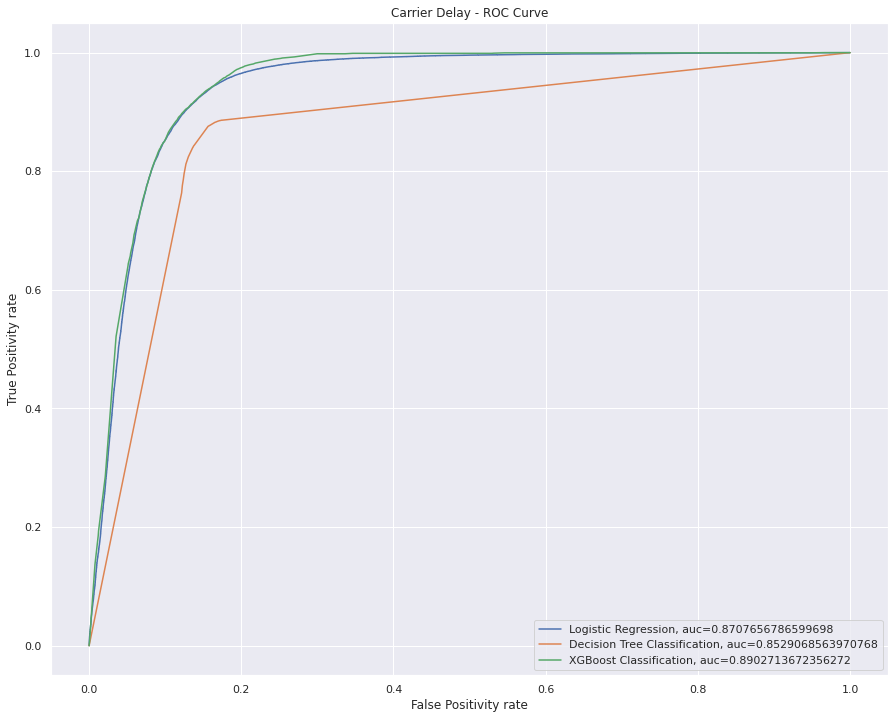

In [79]:
for x in metrics_report:
  plt.plot(x[2],x[3],label=x[0]+', auc='+str(x[4]))
plt.legend(loc=4)
plt.title('Carrier Delay - ROC Curve')
plt.xlabel('False Positivity rate')
plt.ylabel('True Positivity rate')

## Weather Delay

### Logistic

In [80]:
metrics_report = []

In [81]:
n =len(air_multi.loc[(air_multi['weather_delay'] == True), :])
air_new = air_multi.loc[(air_multi['weather_delay'] == False), :].sample(n)
air_new = air_new.append(air_multi.loc[(air_multi['weather_delay'] == True), :],)
air_new =air_new.sample(frac=1).reset_index(drop=True)
air_new

,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,TAIL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Dep_hour,Arr_hour,Dep_min,Arr_min,carr_delay,weather_delay,nas_delay,security_delay,late_air_delay
0,2017,2,13,1,OO,N255SY,LAX,SFO,1900-01-01 08:05:00,930.0,85.0,1900-01-01 09:48:00,1055.0,67.0,103.0,85.0,61.0,0.0,67.0,0.0,0.0,0.0,8,9,5,48,False,True,False,False,False
1,2014,6,1,7,VX,N852VA,LAX,SFO,1900-01-01 13:35:00,1333.0,-2.0,1900-01-01 14:50:00,1435.0,-15.0,75.0,62.0,51.0,0.0,0.0,0.0,0.0,0.0,13,14,35,50,False,False,False,False,False
2,2010,11,20,6,DL,N136DL,LAX,ATL,1900-01-01 07:50:00,748.0,-2.0,1900-01-01 15:01:00,1457.0,-4.0,251.0,249.0,214.0,0.0,0.0,0.0,0.0,0.0,7,15,50,1,False,False,False,False,False
3,2016,11,10,4,VX,N640VA,LAX,JFK,1900-01-01 07:35:00,734.0,-1.0,1900-01-01 15:50:00,1608.0,18.0,315.0,334.0,312.0,0.0,18.0,0.0,0.0,0.0,7,15,35,50,False,True,False,False,False
4,2018,4,28,6,AA,N354PT,LAX,RDU,1900-01-01 07:25:00,721.0,-4.0,1900-01-01 15:17:00,1507.0,-10.0,292.0,286.0,266.0,0.0,0.0,0.0,0.0,0.0,7,15,25,17,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16331,2018,7,6,5,AS,N362VA,LAX,ORD,1900-01-01 17:35:00,1725.0,-10.0,1900-01-01 23:40:00,2336.0,-4.0,245.0,251.0,214.0,0.0,0.0,0.0,0.0,0.0,17,23,35,40,False,False,False,False,False
16332,2016,11,30,3,AA,N855AA,LAX,DFW,1900-01-01 17:30:00,1728.0,-2.0,1900-01-01 22:38:00,2230.0,-8.0,188.0,182.0,142.0,0.0,0.0,0.0,0.0,0.0,17,22,30,38,False,False,False,False,False
16333,2015,12,22,2,AA,N786AA,LAX,JFK,1900-01-01 13:15:00,1332.0,17.0,1900-01-01 21:39:00,2156.0,17.0,324.0,324.0,293.0,0.0,17.0,0.0,0.0,0.0,13,21,15,39,False,True,False,False,False
16334,2015,2,20,5,WN,N704SW,LAX,SJC,1900-01-01 21:35:00,2302.0,87.0,1900-01-01 22:45:00,4.0,79.0,70.0,62.0,48.0,0.0,2.0,0.0,0.0,77.0,21,22,35,45,False,True,False,False,True


In [82]:
X_train, X_test, y_train, y_test = train_test_split(
    air_new.drop(columns=['ORIGIN','DEST','CRS_DEP_TIME','CRS_ARR_TIME','DEP_TIME','ARR_DELAY','ACTUAL_ELAPSED_TIME','AIR_TIME','ARR_TIME','Arr_hour','Arr_min','TAIL_NUM','CARRIER_DELAY', 'WEATHER_DELAY','NAS_DELAY','SECURITY_DELAY','LATE_AIRCRAFT_DELAY','carr_delay',	'weather_delay',	'nas_delay',	'security_delay',	'late_air_delay']), air_new.loc[:,['weather_delay']], test_size=0.3)

In [83]:
numeric_features = ['DEP_DELAY','CRS_ELAPSED_TIME']
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

categorical_features = ['OP_UNIQUE_CARRIER']
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

ordinal_features = ['YEAR']
ordinal_transformer = OrdinalEncoder()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features),
        ('ord', ordinal_transformer, ordinal_features),])

lin_pipe = Pipeline(steps=[('preprocessor', preprocessor),
                          ('pca',TruncatedSVD(n_components=5)),
                         ('classifier', LogisticRegression())])

lin_pipe.fit(X_train, y_train)

pred = lin_pipe.predict(X_test)
print("Model Train score: %.3f" % lin_pipe.score(X_train, y_train))
print("Accuracy score: %.3f" % lin_pipe.score(X_test, y_test))


Model Train score: 0.834
Accuracy score: 0.832


              precision    recall  f1-score   support

       False       0.81      0.87      0.84      2461
        True       0.86      0.79      0.83      2440

    accuracy                           0.83      4901
   macro avg       0.83      0.83      0.83      4901
weighted avg       0.83      0.83      0.83      4901

True Positivity Rate/Sensitivity : 0.794672131147541
True Negative Rate/Specificity :  0.8695652173913043
Confusion Matrix :  [[2140  321]
 [ 501 1939]]


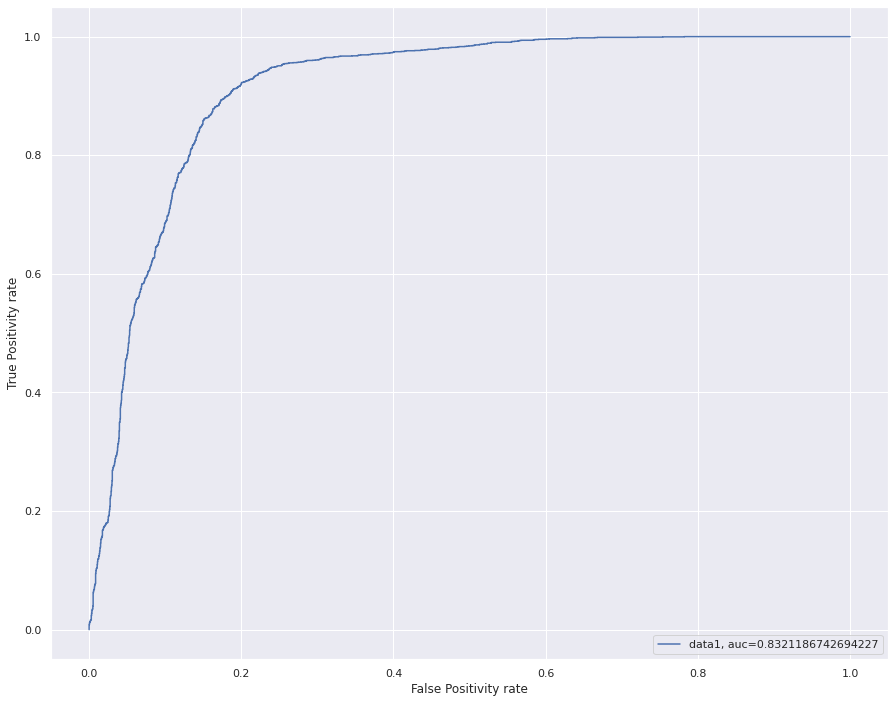

In [84]:
pred = lin_pipe.predict(X_test)
pre_prob = lin_pipe.predict_proba(X_test)[::,1]
print(classification_report(y_test,pred))

tn, fp, fn, tp = confusion_matrix(y_test,pred).ravel()
fpr,tpr, th = metrics.roc_curve(y_test,pre_prob)
print('True Positivity Rate/Sensitivity :', tp/(tp+fn))
print('True Negative Rate/Specificity : ', tn/(tn+fp))
auc = metrics.roc_auc_score(y_test,pred)

print('Confusion Matrix : ',confusion_matrix(y_test,pred))
metrics_report.append(['Logistic Regression',str(classification_report(y_test,pred)), fpr,tpr,auc])
plt.plot(fpr,tpr,label='data1, auc='+str(auc))
plt.legend(loc=4)
plt.xlabel('False Positivity rate')
plt.ylabel('True Positivity rate')

plt.show()

### Decision Tree

In [85]:
numeric_features = ['DEP_DELAY','CRS_ELAPSED_TIME']
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

categorical_features = ['OP_UNIQUE_CARRIER']
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

ordinal_features = ['YEAR']
ordinal_transformer = OrdinalEncoder()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features),
        ('ord', ordinal_transformer, ordinal_features),])

lin_pipe = Pipeline(steps=[('preprocessor', preprocessor),
                         ('classifier', DecisionTreeClassifier())])

lin_pipe.fit(X_train, y_train)

pred = lin_pipe.predict(X_test)
print("Model Train score: %.3f" % lin_pipe.score(X_train, y_train))
print("Accuracy score: %.3f" % lin_pipe.score(X_test, y_test))



Model Train score: 0.993
Accuracy score: 0.824


              precision    recall  f1-score   support

       False       0.82      0.83      0.82      2461
        True       0.83      0.82      0.82      2440

    accuracy                           0.82      4901
   macro avg       0.82      0.82      0.82      4901
weighted avg       0.82      0.82      0.82      4901

True Positivity Rate/Sensitivity : 0.8192622950819672
True Negative Rate/Specificity :  0.8277123120682649
Confusion Matrix :  [[2037  424]
 [ 441 1999]]


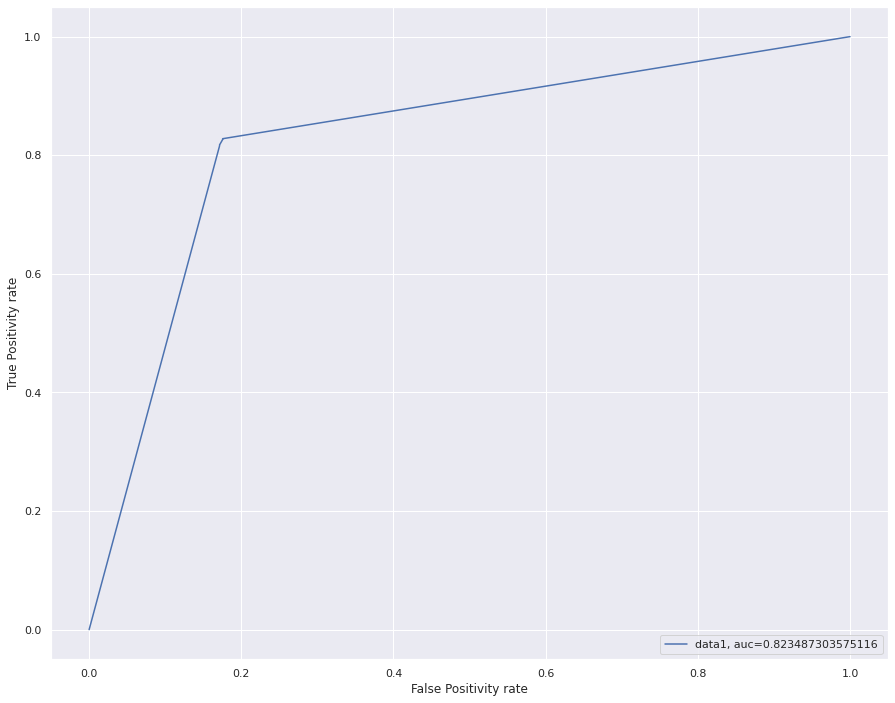

In [86]:
pred = lin_pipe.predict(X_test)
pre_prob = lin_pipe.predict_proba(X_test)[::,1]
print(classification_report(y_test,pred))

tn, fp, fn, tp = confusion_matrix(y_test,pred).ravel()
fpr,tpr, th = metrics.roc_curve(y_test,pre_prob)
print('True Positivity Rate/Sensitivity :', tp/(tp+fn))
print('True Negative Rate/Specificity : ', tn/(tn+fp))
auc = metrics.roc_auc_score(y_test,pred)

print('Confusion Matrix : ',confusion_matrix(y_test,pred))
metrics_report.append(['Decision Tree Classification',str(classification_report(y_test,pred)), fpr,tpr,auc])
plt.plot(fpr,tpr,label='data1, auc='+str(auc))
plt.legend(loc=4)
plt.xlabel('False Positivity rate')
plt.ylabel('True Positivity rate')

plt.show()

### XG Boost

In [87]:
numeric_features = ['DEP_DELAY','CRS_ELAPSED_TIME']
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

categorical_features = ['OP_UNIQUE_CARRIER']
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

ordinal_features = ['YEAR']
ordinal_transformer = OrdinalEncoder()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features),
        ('ord', ordinal_transformer, ordinal_features),])

lin_pipe = Pipeline(steps=[('preprocessor', preprocessor),
                         ('classifier', xgb.XGBRFClassifier())])

lin_pipe.fit(X_train, y_train)

pred = lin_pipe.predict(X_test)
print("Model Train score: %.3f" % lin_pipe.score(X_train, y_train))
print("Accuracy score: %.3f" % lin_pipe.score(X_test, y_test))




Model Train score: 0.867
Accuracy score: 0.863


              precision    recall  f1-score   support

       False       0.91      0.81      0.86      2461
        True       0.83      0.92      0.87      2440

    accuracy                           0.86      4901
   macro avg       0.87      0.86      0.86      4901
weighted avg       0.87      0.86      0.86      4901

True Positivity Rate/Sensitivity : 0.9176229508196722
True Negative Rate/Specificity :  0.809833401056481
Confusion Matrix :  [[1993  468]
 [ 201 2239]]


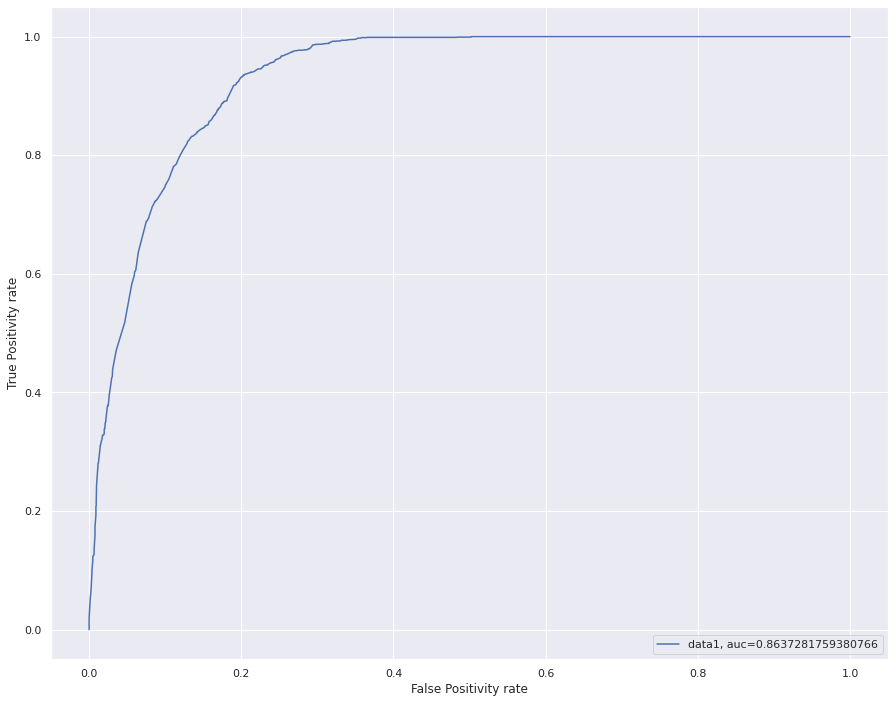

In [88]:
pred = lin_pipe.predict(X_test)
pre_prob = lin_pipe.predict_proba(X_test)[::,1]
print(classification_report(y_test,pred))

tn, fp, fn, tp = confusion_matrix(y_test,pred).ravel()
fpr,tpr, th = metrics.roc_curve(y_test,pre_prob)
print('True Positivity Rate/Sensitivity :', tp/(tp+fn))
print('True Negative Rate/Specificity : ', tn/(tn+fp))
auc = metrics.roc_auc_score(y_test,pred)

print('Confusion Matrix : ',confusion_matrix(y_test,pred))

metrics_report.append(['XGBoost Classification',str(classification_report(y_test,pred)), fpr,tpr,auc])

plt.plot(fpr,tpr,label='data1, auc='+str(auc))
plt.legend(loc=4)
plt.xlabel('False Positivity rate')
plt.ylabel('True Positivity rate')

plt.show()

Text(0, 0.5, 'True Positivity rate')

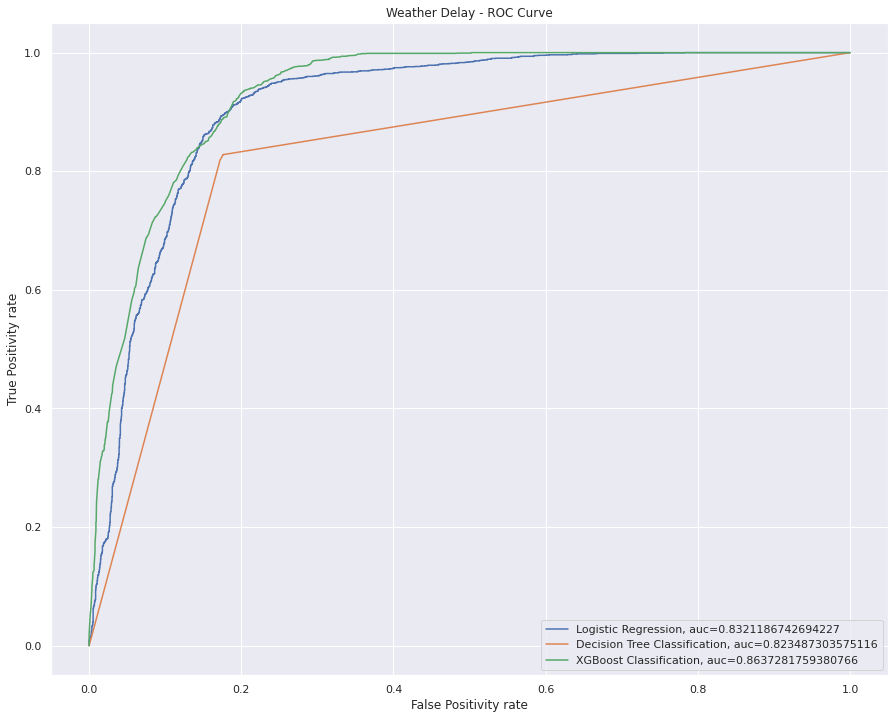

In [89]:
for x in metrics_report:
  plt.plot(x[2],x[3],label=x[0]+', auc='+str(x[4]))
plt.legend(loc=4)
plt.title('Weather Delay - ROC Curve')
plt.xlabel('False Positivity rate')
plt.ylabel('True Positivity rate')

## NAS Delay

In [90]:
metrics_report = []

In [91]:
n =len(air_multi.loc[(air_multi['nas_delay'] == True), :])
air_new = air_multi.loc[(air_multi['nas_delay'] == False), :].sample(n)
air_new = air_new.append(air_multi.loc[(air_multi['nas_delay'] == True), :],)
air_new =air_new.sample(frac=1).reset_index(drop=True)
air_new

,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,TAIL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Dep_hour,Arr_hour,Dep_min,Arr_min,carr_delay,weather_delay,nas_delay,security_delay,late_air_delay
0,2012,8,30,4,VX,N636VA,LAX,JFK,1900-01-01 13:40:00,1408.0,28.0,1900-01-01 22:05:00,2242.0,37.0,325.0,334.0,304.0,0.0,9.0,28.0,0.0,0.0,13,22,40,5,False,True,True,False,False
1,2015,12,12,6,AA,N783AA,LAX,JFK,1900-01-01 07:00:00,652.0,-8.0,1900-01-01 15:23:00,1452.0,-31.0,323.0,300.0,282.0,0.0,0.0,0.0,0.0,0.0,7,15,0,23,False,False,False,False,False
2,2011,4,12,2,OO,N566SW,LAX,SBA,1900-01-01 16:13:00,1609.0,-4.0,1900-01-01 16:57:00,1646.0,-11.0,44.0,37.0,22.0,0.0,0.0,0.0,0.0,0.0,16,16,13,57,False,False,False,False,False
3,2010,3,6,6,AA,N584AA,LAX,DFW,1900-01-01 11:45:00,1140.0,-5.0,1900-01-01 16:50:00,1746.0,56.0,185.0,246.0,173.0,0.0,0.0,56.0,0.0,0.0,11,16,45,50,False,False,True,False,False
4,2014,12,28,7,AS,N317AS,LAX,SEA,1900-01-01 17:40:00,1733.0,-7.0,1900-01-01 20:21:00,2048.0,27.0,161.0,195.0,158.0,0.0,0.0,27.0,0.0,0.0,17,20,40,21,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456583,2016,7,16,6,OO,N616QX,LAX,BOI,1900-01-01 18:15:00,1824.0,9.0,1900-01-01 21:16:00,2117.0,1.0,121.0,113.0,95.0,0.0,0.0,0.0,0.0,0.0,18,21,15,16,False,False,False,False,False
456584,2011,8,25,4,AA,N325AA,LAX,JFK,1900-01-01 11:20:00,1239.0,79.0,1900-01-01 19:55:00,2108.0,73.0,335.0,329.0,298.0,0.0,0.0,58.0,0.0,15.0,11,19,20,55,False,False,True,False,True
456585,2014,6,6,5,OO,N864AS,LAX,FAT,1900-01-01 20:10:00,2119.0,69.0,1900-01-01 21:10:00,2223.0,73.0,60.0,64.0,41.0,13.0,0.0,4.0,0.0,56.0,20,21,10,10,True,False,True,False,True
456586,2019,5,2,4,DL,N718TW,LAX,BOS,1900-01-01 11:35:00,1254.0,79.0,1900-01-01 20:20:00,2110.0,50.0,345.0,316.0,276.0,2.0,0.0,47.0,0.0,1.0,11,20,35,20,True,False,True,False,True


In [92]:
X_train, X_test, y_train, y_test = train_test_split(
    air_new.drop(columns=['ORIGIN','DEST','CRS_DEP_TIME','CRS_ARR_TIME','DEP_TIME','ARR_DELAY','ACTUAL_ELAPSED_TIME','AIR_TIME','ARR_TIME','Arr_hour','Arr_min','TAIL_NUM','CARRIER_DELAY', 'WEATHER_DELAY','NAS_DELAY','SECURITY_DELAY','LATE_AIRCRAFT_DELAY','carr_delay',	'weather_delay',	'nas_delay',	'security_delay',	'late_air_delay']), air_new.loc[:,['nas_delay']], test_size=0.3)

### Logistic

In [93]:
numeric_features = ['DEP_DELAY','CRS_ELAPSED_TIME']
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

categorical_features = ['OP_UNIQUE_CARRIER']
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

ordinal_features = ['YEAR']
ordinal_transformer = OrdinalEncoder()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features),
        ('ord', ordinal_transformer, ordinal_features),])

lin_pipe = Pipeline(steps=[('preprocessor', preprocessor),
                          ('pca',TruncatedSVD(n_components=5)),
                         ('classifier', LogisticRegression())])

lin_pipe.fit(X_train, y_train)

pred = lin_pipe.predict(X_test)
print("Model Train score: %.3f" % lin_pipe.score(X_train, y_train))
print("Accuracy score: %.3f" % lin_pipe.score(X_test, y_test))


Model Train score: 0.725
Accuracy score: 0.726


              precision    recall  f1-score   support

       False       0.68      0.86      0.76     68409
        True       0.81      0.59      0.68     68568

    accuracy                           0.73    136977
   macro avg       0.74      0.73      0.72    136977
weighted avg       0.74      0.73      0.72    136977

True Positivity Rate/Sensitivity : 0.58969198459923
True Negative Rate/Specificity :  0.8624449999269101
Confusion Matrix :  [[58999  9410]
 [28134 40434]]


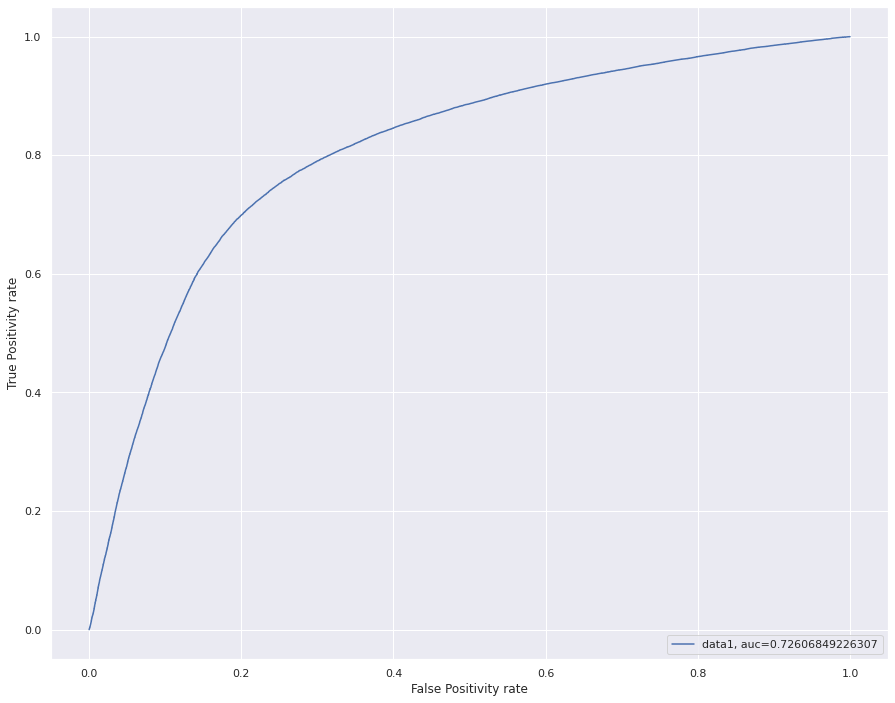

In [94]:
pred = lin_pipe.predict(X_test)
pre_prob = lin_pipe.predict_proba(X_test)[::,1]
print(classification_report(y_test,pred))

tn, fp, fn, tp = confusion_matrix(y_test,pred).ravel()
fpr,tpr, th = metrics.roc_curve(y_test,pre_prob)
print('True Positivity Rate/Sensitivity :', tp/(tp+fn))
print('True Negative Rate/Specificity : ', tn/(tn+fp))
auc = metrics.roc_auc_score(y_test,pred)

print('Confusion Matrix : ',confusion_matrix(y_test,pred))
metrics_report.append(['Logistic Regression',str(classification_report(y_test,pred)), fpr,tpr,auc])
plt.plot(fpr,tpr,label='data1, auc='+str(auc))
plt.legend(loc=4)
plt.xlabel('False Positivity rate')
plt.ylabel('True Positivity rate')

plt.show()

### Decision Tree

In [95]:
numeric_features = ['DEP_DELAY','CRS_ELAPSED_TIME']
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

categorical_features = ['OP_UNIQUE_CARRIER']
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

ordinal_features = ['YEAR']
ordinal_transformer = OrdinalEncoder()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features),
        ('ord', ordinal_transformer, ordinal_features),])

lin_pipe = Pipeline(steps=[('preprocessor', preprocessor),
                         ('classifier', DecisionTreeClassifier())])

lin_pipe.fit(X_train, y_train)

pred = lin_pipe.predict(X_test)
print("Model Train score: %.3f" % lin_pipe.score(X_train, y_train))
print("Accuracy score: %.3f" % lin_pipe.score(X_test, y_test))



Model Train score: 0.896
Accuracy score: 0.694


              precision    recall  f1-score   support

       False       0.68      0.74      0.71     68409
        True       0.72      0.65      0.68     68568

    accuracy                           0.69    136977
   macro avg       0.70      0.69      0.69    136977
weighted avg       0.70      0.69      0.69    136977

True Positivity Rate/Sensitivity : 0.6453885194259713
True Negative Rate/Specificity :  0.7430747416275636
Confusion Matrix :  [[50833 17576]
 [24315 44253]]


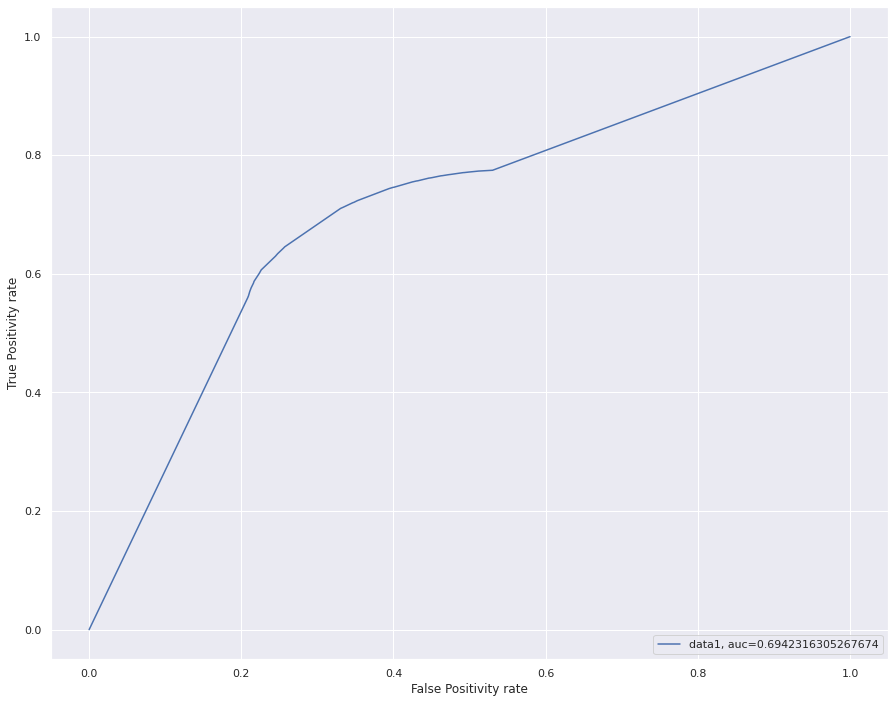

In [96]:
pred = lin_pipe.predict(X_test)
pre_prob = lin_pipe.predict_proba(X_test)[::,1]
print(classification_report(y_test,pred))

tn, fp, fn, tp = confusion_matrix(y_test,pred).ravel()
fpr,tpr, th = metrics.roc_curve(y_test,pre_prob)
print('True Positivity Rate/Sensitivity :', tp/(tp+fn))
print('True Negative Rate/Specificity : ', tn/(tn+fp))
auc = metrics.roc_auc_score(y_test,pred)

print('Confusion Matrix : ',confusion_matrix(y_test,pred))
metrics_report.append(['Decision Tree Classification',str(classification_report(y_test,pred)), fpr,tpr,auc])
plt.plot(fpr,tpr,label='data1, auc='+str(auc))
plt.legend(loc=4)
plt.xlabel('False Positivity rate')
plt.ylabel('True Positivity rate')

plt.show()

### XG Boost

In [97]:
numeric_features = ['DEP_DELAY','CRS_ELAPSED_TIME']
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

categorical_features = ['OP_UNIQUE_CARRIER']
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

ordinal_features = ['YEAR']
ordinal_transformer = OrdinalEncoder()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features),
        ('ord', ordinal_transformer, ordinal_features),])

lin_pipe = Pipeline(steps=[('preprocessor', preprocessor),
                         ('classifier', xgb.XGBRFClassifier())])

lin_pipe.fit(X_train, y_train)

pred = lin_pipe.predict(X_test)
print("Model Train score: %.3f" % lin_pipe.score(X_train, y_train))
print("Accuracy score: %.3f" % lin_pipe.score(X_test, y_test))



Model Train score: 0.756
Accuracy score: 0.756


              precision    recall  f1-score   support

       False       0.74      0.78      0.76     68409
        True       0.77      0.73      0.75     68568

    accuracy                           0.76    136977
   macro avg       0.76      0.76      0.76    136977
weighted avg       0.76      0.76      0.76    136977

True Positivity Rate/Sensitivity : 0.7290427021351068
True Negative Rate/Specificity :  0.783244894677601
Confusion Matrix :  [[53581 14828]
 [18579 49989]]


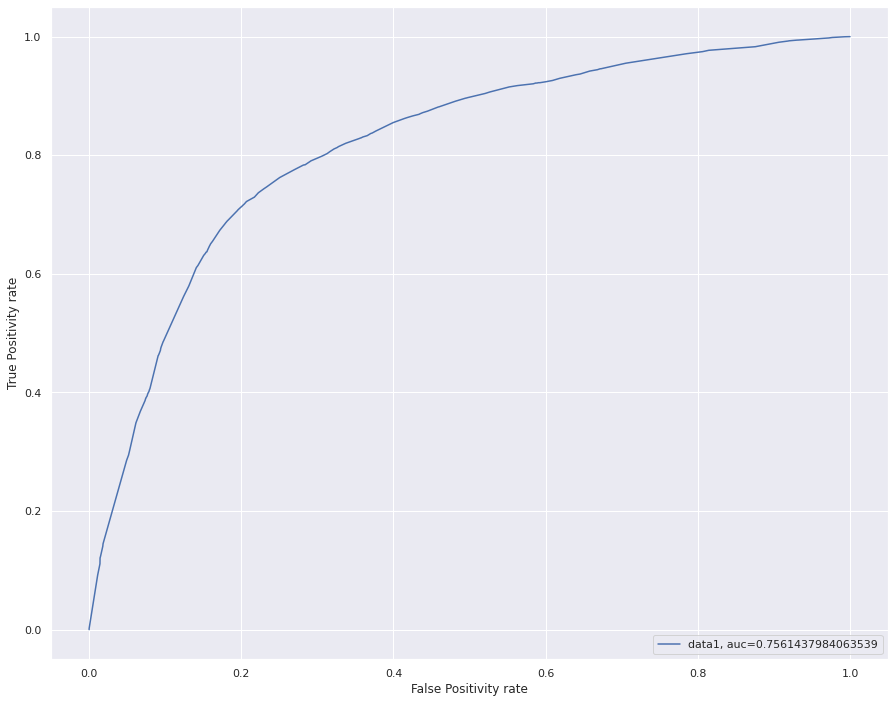

In [98]:
pred = lin_pipe.predict(X_test)
pre_prob = lin_pipe.predict_proba(X_test)[::,1]
print(classification_report(y_test,pred))

tn, fp, fn, tp = confusion_matrix(y_test,pred).ravel()
fpr,tpr, th = metrics.roc_curve(y_test,pre_prob)
print('True Positivity Rate/Sensitivity :', tp/(tp+fn))
print('True Negative Rate/Specificity : ', tn/(tn+fp))
auc = metrics.roc_auc_score(y_test,pred)

print('Confusion Matrix : ',confusion_matrix(y_test,pred))

metrics_report.append(['XGBoost Classification',str(classification_report(y_test,pred)), fpr,tpr,auc])

plt.plot(fpr,tpr,label='data1, auc='+str(auc))
plt.legend(loc=4)
plt.xlabel('False Positivity rate')
plt.ylabel('True Positivity rate')

plt.show()

Text(0, 0.5, 'True Positivity rate')

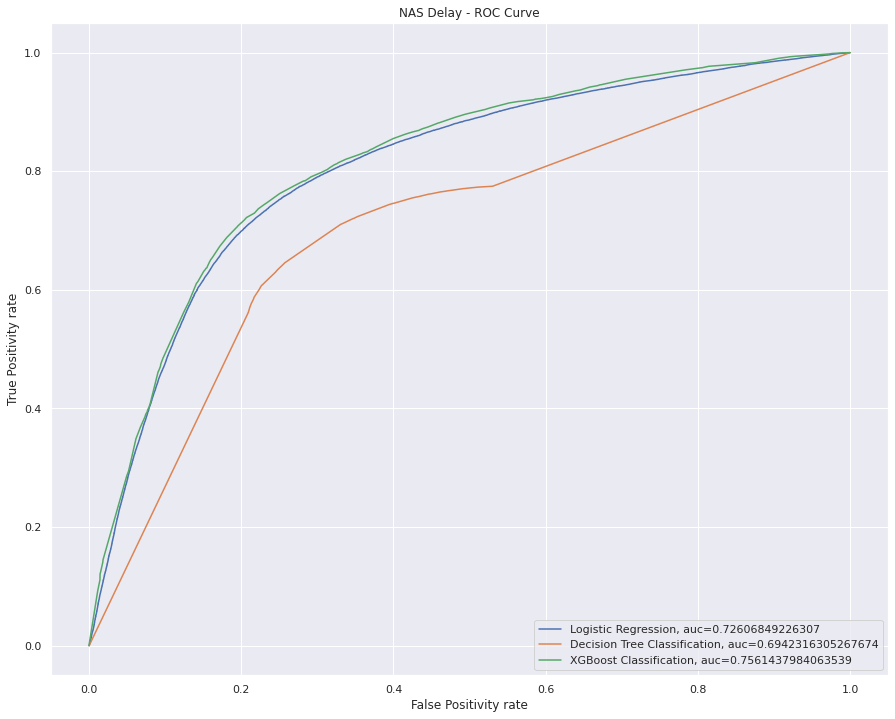

In [99]:
for x in metrics_report:
  plt.plot(x[2],x[3],label=x[0]+', auc='+str(x[4]))
plt.legend(loc=4)
plt.title('NAS Delay - ROC Curve')
plt.xlabel('False Positivity rate')
plt.ylabel('True Positivity rate')

## Security

In [100]:
metrics_report = []

In [101]:
n =len(air_multi.loc[(air_multi['security_delay'] == True), :])
air_new = air_multi.loc[(air_multi['security_delay'] == False), :].sample(n)
air_new = air_new.append(air_multi.loc[(air_multi['security_delay'] == True), :],)
air_new =air_new.sample(frac=1).reset_index(drop=True)
air_new

,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,TAIL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Dep_hour,Arr_hour,Dep_min,Arr_min,carr_delay,weather_delay,nas_delay,security_delay,late_air_delay
0,2015,7,31,5,WN,N8610A,LAX,DEN,1900-01-01 20:30:00,2025.0,-5.0,1900-01-01 23:40:00,2338.0,-2.0,130.0,133.0,110.0,0.0,0.0,0.0,0.0,0.0,20,23,30,40,False,False,False,False,False
1,2013,11,22,5,AA,N3JTAA,LAX,DFW,1900-01-01 19:05:00,2240.0,215.0,1900-01-01 23:55:00,334.0,219.0,170.0,174.0,152.0,0.0,0.0,4.0,2.0,213.0,19,23,5,55,False,False,True,True,True
2,2020,8,24,1,DL,N693DL,LAX,MSP,1900-01-01 08:25:00,821.0,-4.0,1900-01-01 13:49:00,1334.0,-15.0,204.0,193.0,179.0,0.0,0.0,0.0,0.0,0.0,8,13,25,49,False,False,False,False,False
3,2013,11,22,5,DL,N3758Y,LAX,CVG,1900-01-01 23:10:00,45.0,95.0,1900-01-01 06:16:00,730.0,74.0,246.0,225.0,209.0,0.0,0.0,0.0,74.0,0.0,23,6,10,16,False,False,False,True,False
4,2014,3,7,5,UA,N14228,LAX,IAH,1900-01-01 05:33:00,525.0,-8.0,1900-01-01 10:48:00,1030.0,-18.0,195.0,185.0,156.0,0.0,0.0,0.0,0.0,0.0,5,10,33,48,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2743,2018,9,17,1,DL,N326DN,LAX,ATL,1900-01-01 22:48:00,2339.0,51.0,1900-01-01 06:00:00,647.0,47.0,252.0,248.0,232.0,0.0,0.0,0.0,47.0,0.0,22,6,48,0,False,False,False,True,False
2744,2019,11,4,1,DL,N335DN,LAX,DTW,1900-01-01 22:20:00,2220.0,0.0,1900-01-01 05:45:00,540.0,-5.0,265.0,260.0,231.0,0.0,0.0,0.0,0.0,0.0,22,5,20,45,False,False,False,False,False
2745,2017,6,16,5,VX,N281VA,LAX,SFO,1900-01-01 06:50:00,704.0,14.0,1900-01-01 08:10:00,841.0,31.0,80.0,97.0,50.0,3.0,0.0,0.0,14.0,14.0,6,8,50,10,True,False,False,True,True
2746,2019,6,6,4,WN,N726SW,LAX,STL,1900-01-01 09:30:00,1126.0,116.0,1900-01-01 15:10:00,1651.0,101.0,220.0,205.0,192.0,0.0,0.0,0.0,17.0,84.0,9,15,30,10,False,False,False,True,True


In [102]:
X_train, X_test, y_train, y_test = train_test_split(
    air_new.drop(columns=['ORIGIN','DEST','CRS_DEP_TIME','CRS_ARR_TIME','DEP_TIME','ARR_DELAY','ACTUAL_ELAPSED_TIME','AIR_TIME','ARR_TIME','Arr_hour','Arr_min','TAIL_NUM','CARRIER_DELAY', 'WEATHER_DELAY','NAS_DELAY','SECURITY_DELAY','LATE_AIRCRAFT_DELAY','carr_delay',	'weather_delay',	'nas_delay',	'security_delay',	'late_air_delay']), air_new.loc[:,['security_delay']], test_size=0.3)

### Logistic

In [103]:
numeric_features = ['DEP_DELAY','CRS_ELAPSED_TIME']
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

categorical_features = ['OP_UNIQUE_CARRIER']
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

ordinal_features = ['YEAR']
ordinal_transformer = OrdinalEncoder()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features),
        ('ord', ordinal_transformer, ordinal_features),])

lin_pipe = Pipeline(steps=[('preprocessor', preprocessor),
                          ('pca',TruncatedSVD(n_components=5)),
                         ('classifier', LogisticRegression())])

lin_pipe.fit(X_train, y_train)

pred = lin_pipe.predict(X_test)
print("Model Train score: %.3f" % lin_pipe.score(X_train, y_train))
print("Accuracy score: %.3f" % lin_pipe.score(X_test, y_test))


Model Train score: 0.789
Accuracy score: 0.788


              precision    recall  f1-score   support

       False       0.74      0.88      0.80       406
        True       0.86      0.70      0.77       419

    accuracy                           0.79       825
   macro avg       0.80      0.79      0.79       825
weighted avg       0.80      0.79      0.79       825

True Positivity Rate/Sensitivity : 0.6992840095465394
True Negative Rate/Specificity :  0.8793103448275862
Confusion Matrix :  [[357  49]
 [126 293]]


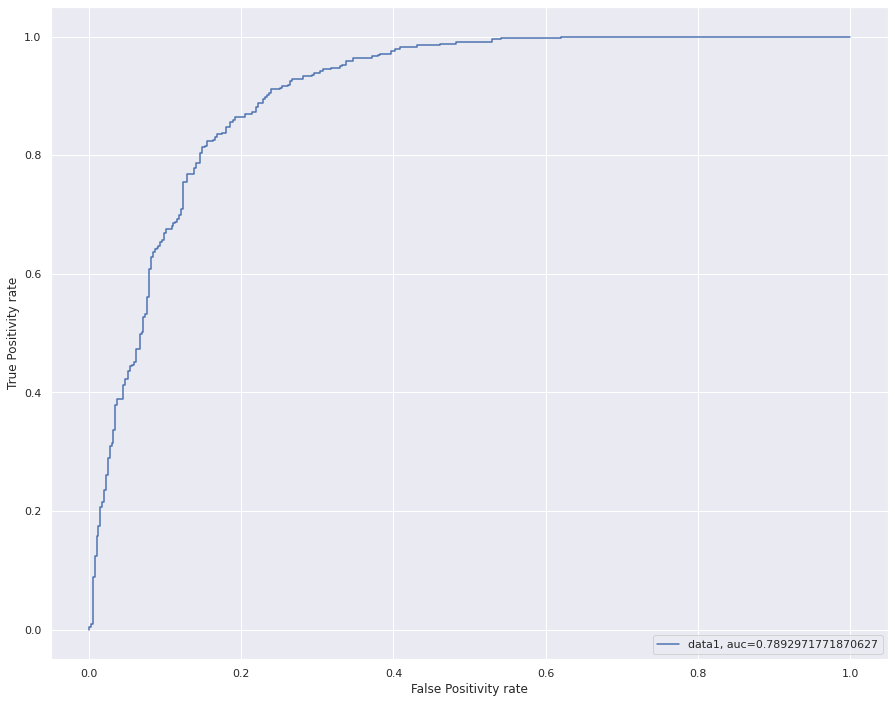

In [104]:
pred = lin_pipe.predict(X_test)
pre_prob = lin_pipe.predict_proba(X_test)[::,1]
print(classification_report(y_test,pred))

tn, fp, fn, tp = confusion_matrix(y_test,pred).ravel()
fpr,tpr, th = metrics.roc_curve(y_test,pre_prob)
print('True Positivity Rate/Sensitivity :', tp/(tp+fn))
print('True Negative Rate/Specificity : ', tn/(tn+fp))
auc = metrics.roc_auc_score(y_test,pred)

print('Confusion Matrix : ',confusion_matrix(y_test,pred))
metrics_report.append(['Logistic Regression',str(classification_report(y_test,pred)), fpr,tpr,auc])
plt.plot(fpr,tpr,label='data1, auc='+str(auc))
plt.legend(loc=4)
plt.xlabel('False Positivity rate')
plt.ylabel('True Positivity rate')

plt.show()

### Decsion Tree

In [105]:
numeric_features = ['DEP_DELAY','CRS_ELAPSED_TIME']
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

categorical_features = ['OP_UNIQUE_CARRIER']
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

ordinal_features = ['YEAR']
ordinal_transformer = OrdinalEncoder()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features),
        ('ord', ordinal_transformer, ordinal_features),])

lin_pipe = Pipeline(steps=[('preprocessor', preprocessor),
                         ('classifier', DecisionTreeClassifier())])

lin_pipe.fit(X_train, y_train)

pred = lin_pipe.predict(X_test)
print("Model Train score: %.3f" % lin_pipe.score(X_train, y_train))
print("Accuracy score: %.3f" % lin_pipe.score(X_test, y_test))


Model Train score: 0.999
Accuracy score: 0.817


              precision    recall  f1-score   support

       False       0.81      0.82      0.82       406
        True       0.82      0.81      0.82       419

    accuracy                           0.82       825
   macro avg       0.82      0.82      0.82       825
weighted avg       0.82      0.82      0.82       825

True Positivity Rate/Sensitivity : 0.8138424821002387
True Negative Rate/Specificity :  0.8201970443349754
Confusion Matrix :  [[333  73]
 [ 78 341]]


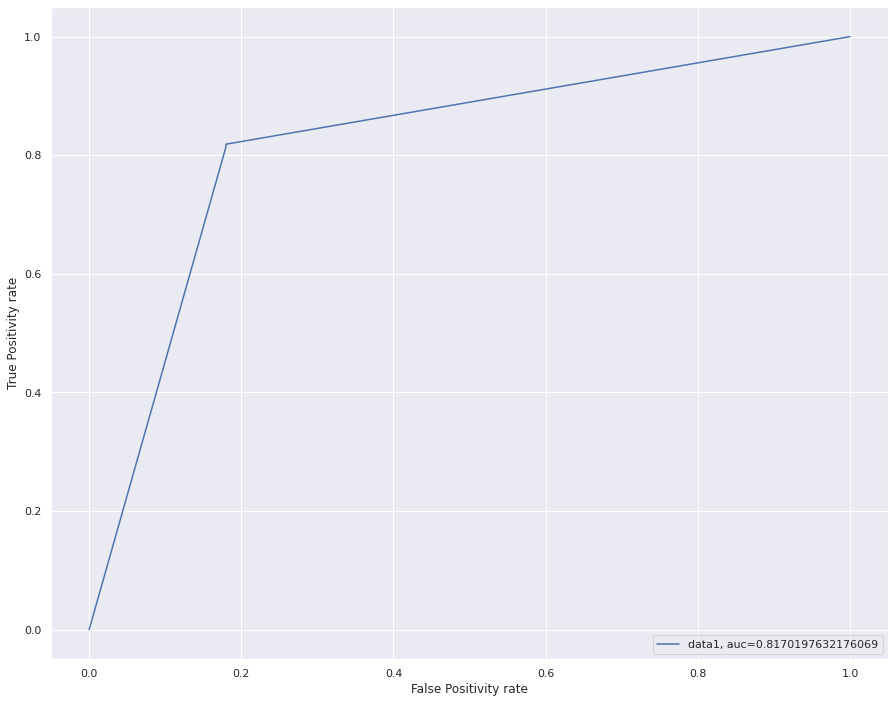

In [106]:
pred = lin_pipe.predict(X_test)
pre_prob = lin_pipe.predict_proba(X_test)[::,1]
print(classification_report(y_test,pred))

tn, fp, fn, tp = confusion_matrix(y_test,pred).ravel()
fpr,tpr, th = metrics.roc_curve(y_test,pre_prob)
print('True Positivity Rate/Sensitivity :', tp/(tp+fn))
print('True Negative Rate/Specificity : ', tn/(tn+fp))
auc = metrics.roc_auc_score(y_test,pred)

print('Confusion Matrix : ',confusion_matrix(y_test,pred))
metrics_report.append(['Decision Tree Classification',str(classification_report(y_test,pred)), fpr,tpr,auc])
plt.plot(fpr,tpr,label='data1, auc='+str(auc))
plt.legend(loc=4)
plt.xlabel('False Positivity rate')
plt.ylabel('True Positivity rate')

plt.show()

### XG Boost

In [107]:
numeric_features = ['DEP_DELAY','CRS_ELAPSED_TIME']
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

categorical_features = ['OP_UNIQUE_CARRIER']
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

ordinal_features = ['YEAR']
ordinal_transformer = OrdinalEncoder()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features),
        ('ord', ordinal_transformer, ordinal_features),])

lin_pipe = Pipeline(steps=[('preprocessor', preprocessor),
                         ('classifier', xgb.XGBRFClassifier())])

lin_pipe.fit(X_train, y_train)

pred = lin_pipe.predict(X_test)
print("Model Train score: %.3f" % lin_pipe.score(X_train, y_train))
print("Accuracy score: %.3f" % lin_pipe.score(X_test, y_test))


Model Train score: 0.857
Accuracy score: 0.856


              precision    recall  f1-score   support

       False       0.92      0.77      0.84       406
        True       0.81      0.94      0.87       419

    accuracy                           0.86       825
   macro avg       0.87      0.85      0.85       825
weighted avg       0.86      0.86      0.85       825

True Positivity Rate/Sensitivity : 0.9355608591885441
True Negative Rate/Specificity :  0.7733990147783252
Confusion Matrix :  [[314  92]
 [ 27 392]]


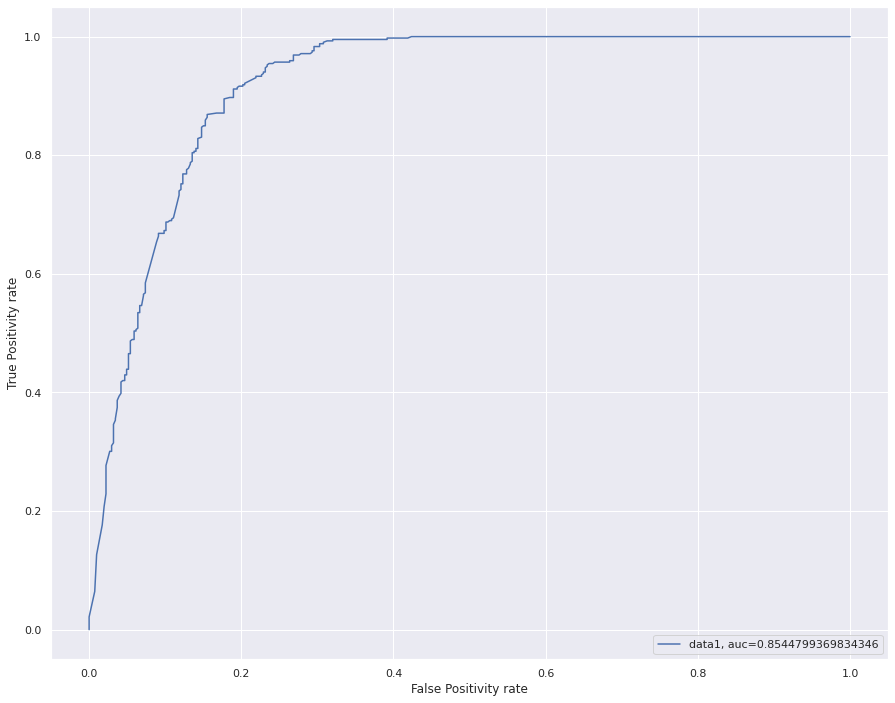

In [108]:
pred = lin_pipe.predict(X_test)
pre_prob = lin_pipe.predict_proba(X_test)[::,1]
print(classification_report(y_test,pred))

tn, fp, fn, tp = confusion_matrix(y_test,pred).ravel()
fpr,tpr, th = metrics.roc_curve(y_test,pre_prob)
print('True Positivity Rate/Sensitivity :', tp/(tp+fn))
print('True Negative Rate/Specificity : ', tn/(tn+fp))
auc = metrics.roc_auc_score(y_test,pred)

print('Confusion Matrix : ',confusion_matrix(y_test,pred))

metrics_report.append(['XGBoost Classification',str(classification_report(y_test,pred)), fpr,tpr,auc])

plt.plot(fpr,tpr,label='data1, auc='+str(auc))
plt.legend(loc=4)
plt.xlabel('False Positivity rate')
plt.ylabel('True Positivity rate')

plt.show()

Text(0, 0.5, 'True Positivity rate')

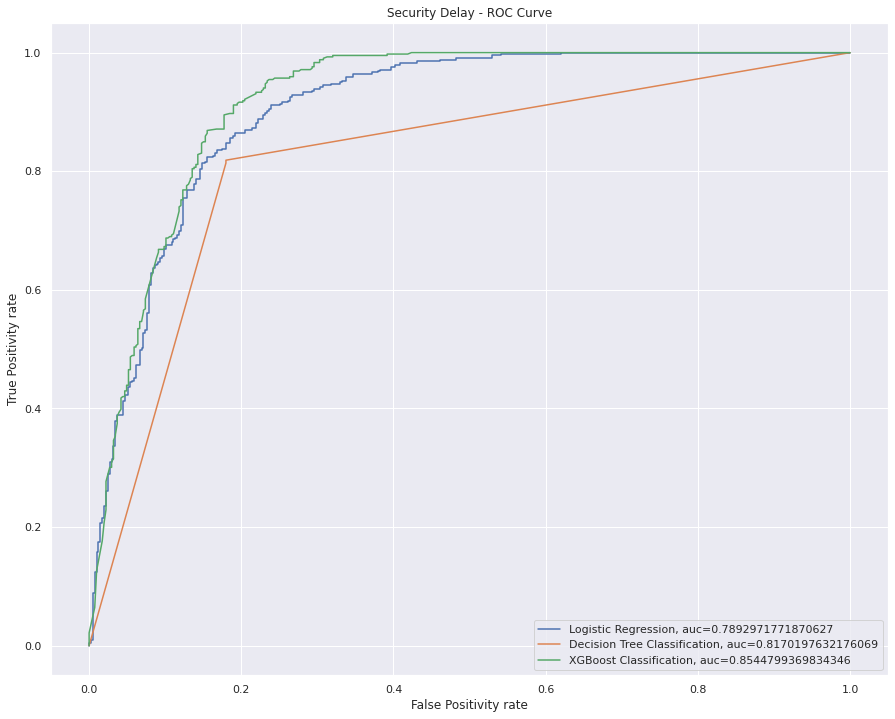

In [109]:
for x in metrics_report:
  plt.plot(x[2],x[3],label=x[0]+', auc='+str(x[4]))
plt.legend(loc=4)
plt.title('Security Delay - ROC Curve')
plt.xlabel('False Positivity rate')
plt.ylabel('True Positivity rate')

## Late Aircraft

In [110]:
metrics_report = []

In [111]:
n =len(air_multi.loc[(air_multi['late_air_delay'] == True), :])
air_new = air_multi.loc[(air_multi['late_air_delay'] == False), :].sample(n)
air_new = air_new.append(air_multi.loc[(air_multi['late_air_delay'] == True), :],)
air_new =air_new.sample(frac=1).reset_index(drop=True)
air_new

,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,TAIL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Dep_hour,Arr_hour,Dep_min,Arr_min,carr_delay,weather_delay,nas_delay,security_delay,late_air_delay
0,2018,11,10,6,WN,N7819A,LAX,LAS,1900-01-01 13:20:00,1326.0,6.0,1900-01-01 14:40:00,1430.0,-10.0,80.0,64.0,47.0,0.0,0.0,0.0,0.0,0.0,13,14,20,40,False,False,False,False,False
1,2017,8,22,2,WN,N767SW,LAX,STL,1900-01-01 09:25:00,944.0,19.0,1900-01-01 14:55:00,1512.0,17.0,210.0,208.0,188.0,0.0,0.0,0.0,0.0,17.0,9,14,25,55,False,False,False,False,True
2,2017,3,22,3,OO,N251SY,LAX,SFO,1900-01-01 14:00:00,1445.0,45.0,1900-01-01 15:30:00,1610.0,40.0,90.0,85.0,54.0,0.0,0.0,0.0,0.0,40.0,14,15,0,30,False,False,False,False,True
3,2019,8,8,4,DL,N704X,LAX,JFK,1900-01-01 21:20:00,2304.0,104.0,1900-01-01 06:00:00,714.0,74.0,340.0,310.0,291.0,48.0,0.0,0.0,0.0,26.0,21,6,20,0,True,False,False,False,True
4,2017,11,22,3,UA,N76533,LAX,SFO,1900-01-01 10:20:00,1017.0,-3.0,1900-01-01 11:57:00,1140.0,-17.0,97.0,83.0,62.0,0.0,0.0,0.0,0.0,0.0,10,11,20,57,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
457131,2015,9,3,4,WN,N378SW,LAX,AUS,1900-01-01 18:15:00,1900.0,45.0,1900-01-01 23:15:00,2400.0,45.0,180.0,180.0,156.0,0.0,0.0,0.0,0.0,45.0,18,23,15,15,False,False,False,False,True
457132,2012,8,4,6,UA,N57863,LAX,IAD,1900-01-01 23:15:00,2342.0,27.0,1900-01-01 07:03:00,714.0,11.0,288.0,272.0,256.0,0.0,0.0,0.0,0.0,0.0,23,7,15,3,False,False,False,False,False
457133,2016,9,25,7,OO,N825SK,LAX,DEN,1900-01-01 15:15:00,1513.0,-2.0,1900-01-01 18:31:00,1844.0,13.0,136.0,151.0,118.0,0.0,0.0,0.0,0.0,0.0,15,18,15,31,False,False,False,False,False
457134,2016,12,9,5,WN,N633SW,LAX,OAK,1900-01-01 10:40:00,1106.0,26.0,1900-01-01 12:00:00,1216.0,16.0,80.0,70.0,56.0,0.0,0.0,0.0,0.0,16.0,10,12,40,0,False,False,False,False,True


In [112]:
X_train, X_test, y_train, y_test = train_test_split(
    air_new.drop(columns=['ORIGIN','DEST','CRS_DEP_TIME','CRS_ARR_TIME','DEP_TIME','ARR_DELAY','ACTUAL_ELAPSED_TIME','AIR_TIME','ARR_TIME','Arr_hour','Arr_min','TAIL_NUM','CARRIER_DELAY', 'WEATHER_DELAY','NAS_DELAY','SECURITY_DELAY','LATE_AIRCRAFT_DELAY','carr_delay',	'weather_delay',	'nas_delay',	'security_delay',	'late_air_delay']), air_new.loc[:,['late_air_delay']], test_size=0.3)

### Logistic

In [113]:
numeric_features = ['DEP_DELAY','CRS_ELAPSED_TIME']
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

categorical_features = ['OP_UNIQUE_CARRIER']
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

ordinal_features = ['YEAR']
ordinal_transformer = OrdinalEncoder()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features),
        ('ord', ordinal_transformer, ordinal_features),])

lin_pipe = Pipeline(steps=[('preprocessor', preprocessor),
                          ('pca',TruncatedSVD(n_components=5)),
                         ('classifier', LogisticRegression())])

lin_pipe.fit(X_train, y_train)

pred = lin_pipe.predict(X_test)
print("Model Train score: %.3f" % lin_pipe.score(X_train, y_train))
print("Accuracy score: %.3f" % lin_pipe.score(X_test, y_test))


Model Train score: 0.906
Accuracy score: 0.906


              precision    recall  f1-score   support

       False       0.89      0.93      0.91     68531
        True       0.92      0.88      0.90     68610

    accuracy                           0.91    137141
   macro avg       0.91      0.91      0.91    137141
weighted avg       0.91      0.91      0.91    137141

True Positivity Rate/Sensitivity : 0.8847544089782831
True Negative Rate/Specificity :  0.9265441916796778
Confusion Matrix :  [[63497  5034]
 [ 7907 60703]]


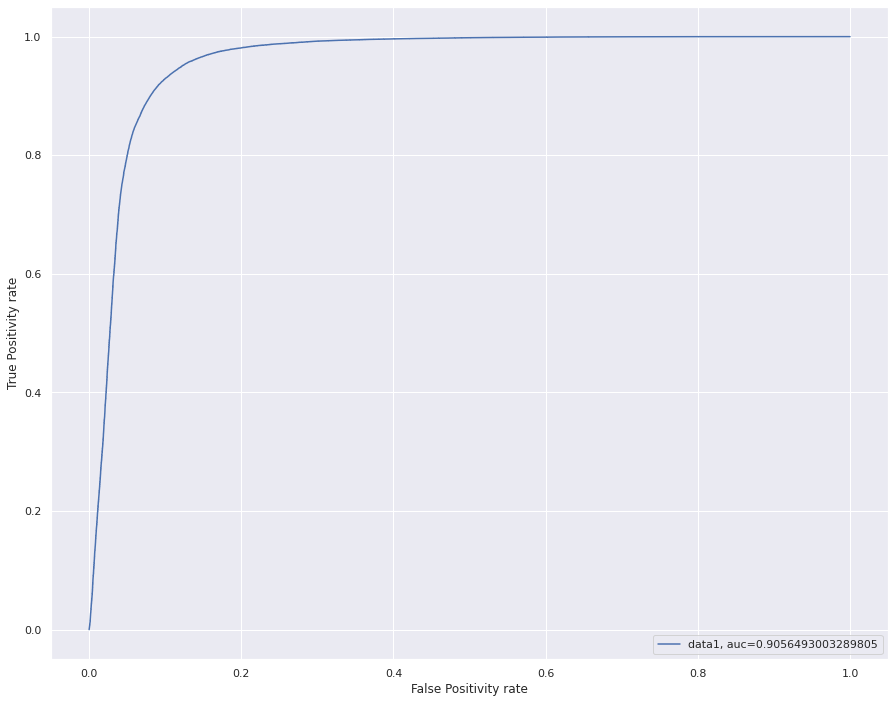

In [114]:
pred = lin_pipe.predict(X_test)
pre_prob = lin_pipe.predict_proba(X_test)[::,1]
print(classification_report(y_test,pred))

tn, fp, fn, tp = confusion_matrix(y_test,pred).ravel()
fpr,tpr, th = metrics.roc_curve(y_test,pre_prob)
print('True Positivity Rate/Sensitivity :', tp/(tp+fn))
print('True Negative Rate/Specificity : ', tn/(tn+fp))
auc = metrics.roc_auc_score(y_test,pred)

print('Confusion Matrix : ',confusion_matrix(y_test,pred))
metrics_report.append(['Logistic Regression',str(classification_report(y_test,pred)), fpr,tpr,auc])
plt.plot(fpr,tpr,label='data1, auc='+str(auc))
plt.legend(loc=4)
plt.xlabel('False Positivity rate')
plt.ylabel('True Positivity rate')

plt.show()

### Decision Tree

In [115]:
numeric_features = ['DEP_DELAY','CRS_ELAPSED_TIME']
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

categorical_features = ['OP_UNIQUE_CARRIER']
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

ordinal_features = ['YEAR']
ordinal_transformer = OrdinalEncoder()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features),
        ('ord', ordinal_transformer, ordinal_features),])

lin_pipe = Pipeline(steps=[('preprocessor', preprocessor),
                         ('classifier', DecisionTreeClassifier())])

lin_pipe.fit(X_train, y_train)

pred = lin_pipe.predict(X_test)
print("Model Train score: %.3f" % lin_pipe.score(X_train, y_train))
print("Accuracy score: %.3f" % lin_pipe.score(X_test, y_test))


Model Train score: 0.976
Accuracy score: 0.885


              precision    recall  f1-score   support

       False       0.88      0.89      0.89     68531
        True       0.89      0.88      0.88     68610

    accuracy                           0.88    137141
   macro avg       0.88      0.88      0.88    137141
weighted avg       0.88      0.88      0.88    137141

True Positivity Rate/Sensitivity : 0.8774085410290046
True Negative Rate/Specificity :  0.8921072215493718
Confusion Matrix :  [[61137  7394]
 [ 8411 60199]]


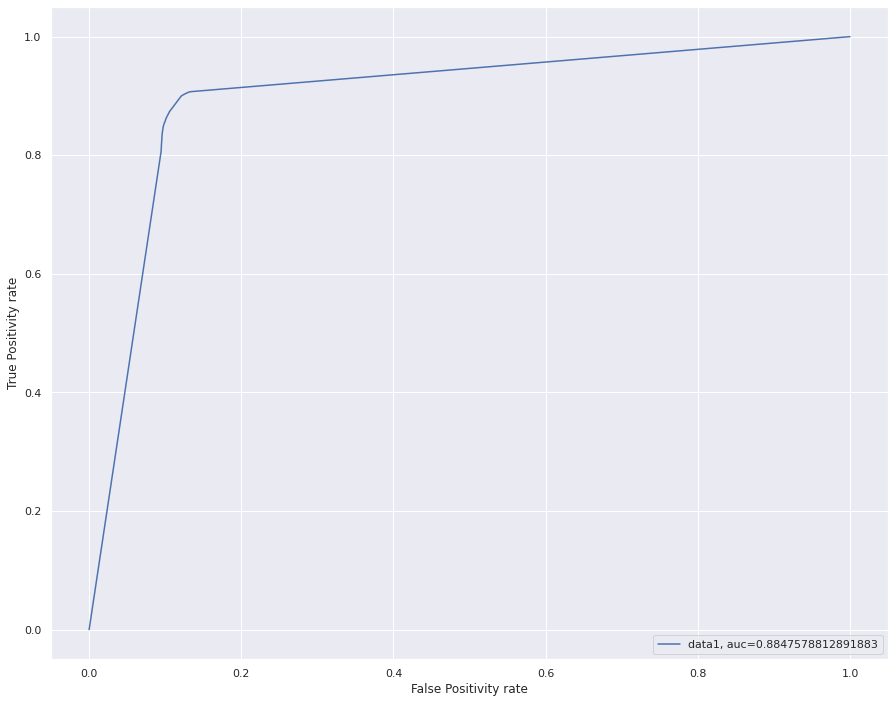

In [116]:
pred = lin_pipe.predict(X_test)
pre_prob = lin_pipe.predict_proba(X_test)[::,1]
print(classification_report(y_test,pred))

tn, fp, fn, tp = confusion_matrix(y_test,pred).ravel()
fpr,tpr, th = metrics.roc_curve(y_test,pre_prob)
print('True Positivity Rate/Sensitivity :', tp/(tp+fn))
print('True Negative Rate/Specificity : ', tn/(tn+fp))
auc = metrics.roc_auc_score(y_test,pred)

print('Confusion Matrix : ',confusion_matrix(y_test,pred))
metrics_report.append(['Decision Tree Classification',str(classification_report(y_test,pred)), fpr,tpr,auc])

plt.plot(fpr,tpr,label='data1, auc='+str(auc))
plt.legend(loc=4)
plt.xlabel('False Positivity rate')
plt.ylabel('True Positivity rate')

plt.show()

### XG Boost

In [117]:
numeric_features = ['DEP_DELAY','CRS_ELAPSED_TIME']
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

categorical_features = ['OP_UNIQUE_CARRIER']
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

ordinal_features = ['YEAR']
ordinal_transformer = OrdinalEncoder()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features),
        ('ord', ordinal_transformer, ordinal_features),])

lin_pipe = Pipeline(steps=[('preprocessor', preprocessor),
                         ('classifier', xgb.XGBRFClassifier())])

lin_pipe.fit(X_train, y_train)

pred = lin_pipe.predict(X_test)
print("Model Train score: %.3f" % lin_pipe.score(X_train, y_train))
print("Accuracy score: %.3f" % lin_pipe.score(X_test, y_test))


Model Train score: 0.918
Accuracy score: 0.917


              precision    recall  f1-score   support

       False       0.95      0.88      0.91     68531
        True       0.89      0.96      0.92     68610

    accuracy                           0.92    137141
   macro avg       0.92      0.92      0.92    137141
weighted avg       0.92      0.92      0.92    137141

True Positivity Rate/Sensitivity : 0.955035709080309
True Negative Rate/Specificity :  0.8785659044811837
Confusion Matrix :  [[60209  8322]
 [ 3085 65525]]


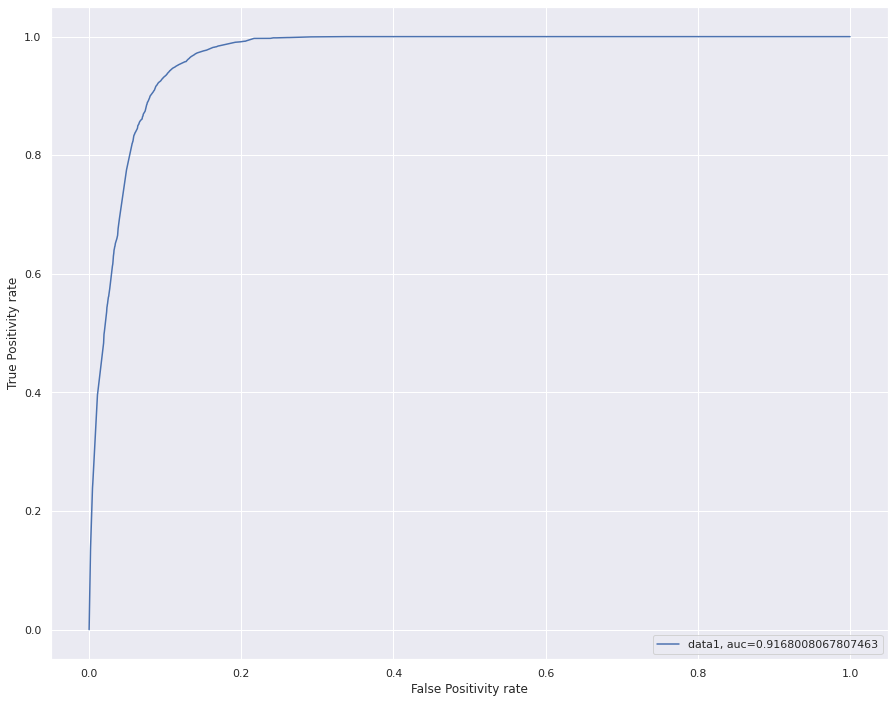

In [118]:
pred = lin_pipe.predict(X_test)
pre_prob = lin_pipe.predict_proba(X_test)[::,1]
print(classification_report(y_test,pred))

tn, fp, fn, tp = confusion_matrix(y_test,pred).ravel()
fpr,tpr, th = metrics.roc_curve(y_test,pre_prob)
print('True Positivity Rate/Sensitivity :', tp/(tp+fn))
print('True Negative Rate/Specificity : ', tn/(tn+fp))
auc = metrics.roc_auc_score(y_test,pred)

print('Confusion Matrix : ',confusion_matrix(y_test,pred))

metrics_report.append(['XGBoost Classification',str(classification_report(y_test,pred)), fpr,tpr,auc])

plt.plot(fpr,tpr,label='data1, auc='+str(auc))
plt.legend(loc=4)
plt.xlabel('False Positivity rate')
plt.ylabel('True Positivity rate')

plt.show()

Text(0, 0.5, 'True Positivity rate')

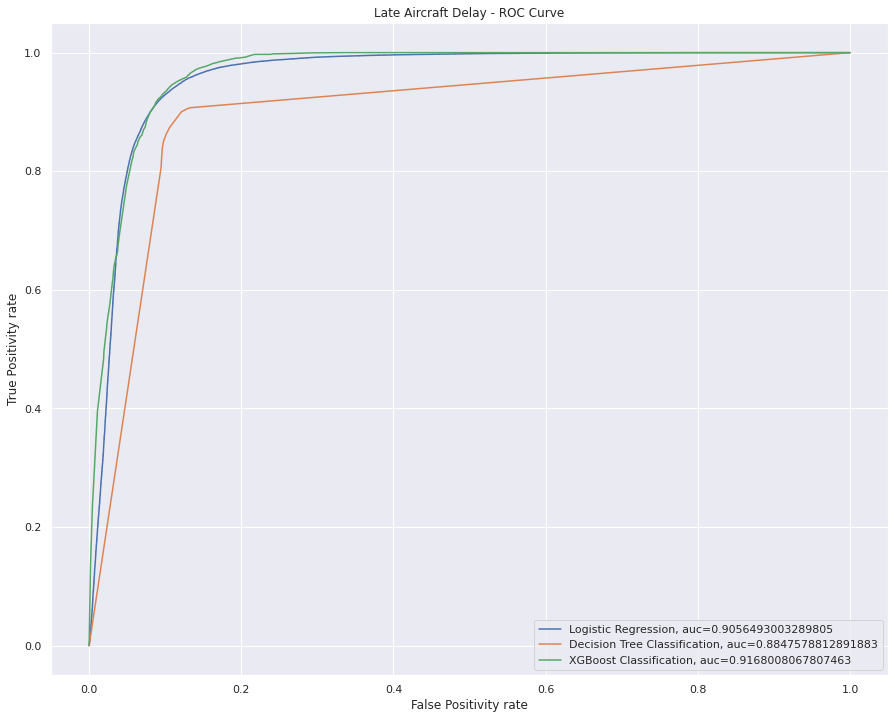

In [119]:
for x in metrics_report:
  plt.plot(x[2],x[3],label=x[0]+', auc='+str(x[4]))
plt.legend(loc=4)
plt.title('Late Aircraft Delay - ROC Curve')
plt.xlabel('False Positivity rate')
plt.ylabel('True Positivity rate')